In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import datetime

%matplotlib inline

# Import Data

แปลง DOB และ System Car Code Date ให้เป็น วัน

In [131]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IS/chaiyo.xlsx", skiprows=1, parse_dates=['DOB','System CAR Code Date'])
df.head()

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Model,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,Day Past Due (Aging),Application Status
0,25650701INSI00001,7400.12,NaN,NaN,NaN,F,1984-08-29,พนักงานบริษัท,15000.0,NaN,...,NaN,NaN,NaN,NaN,MVS2022040181327,S1,2022-07-01,S1,0.0,APPLICATION_COMPLETED
1,25650701RET100001,150000.00,150000.00,150000.00,4.0,M,1958-10-21,เกษตรกร,50000.0,4WH,...,D-MAX,2007.0,ZL,290500.0,NaN,S1,2022-07-01,S1,0.0,APPLICATION_COMPLETED
2,25650701REUC00002,163800.00,163800.00,163800.00,48.0,F,1978-06-27,STREET VENDOR,50000.0,CAR,...,ALMERA,2017.0,AT,234000.0,NLG224034612,S1,2022-07-01,S1,0.0,APPLICATION_COMPLETED
3,25650701REUC00003,127500.00,127438.50,127438.50,60.0,F,1986-07-04,STREET VENDOR,15000.0,CAR,...,YARIS,2006.0,DH,170000.0,NLG224034615,S1,2022-07-01,S1,14.0,APPLICATION_COMPLETED
4,25650701REUC00004,223200.00,220986.53,220986.53,60.0,F,1977-05-28,พนักงานบริษัท,16000.0,PU,...,TRITON,2014.0,BC,343500.0,NLG224034666,S1,2022-07-01,S1,0.0,APPLICATION_COMPLETED


In [132]:
df.rename(columns={'Day Past Due (Aging)':'DPD'}, inplace=True)
df['age'] = pd.to_datetime('today').year - df.DOB.dt.year

In [133]:
print(df.shape)
df.tail()

(26715, 22)


,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age
26710,25650927ULMB00166,27000.0,27000.0,27028.0,36.0,M,1980-10-12,รับจ้างทั่วไป,20000.0,NaN,...,2018.0,DH,43000.0,NaN,S1,2022-09-27,S1,0.0,APPLICATION_COMPLETED,42
26711,25650927ULMB00167,10000.0,10000.0,10010.0,12.0,M,1960-03-09,รับจ้างทั่วไป,10000.0,NaN,...,2009.0,AF,19000.0,NaN,S1,2022-09-27,S1,0.0,APPLICATION_COMPLETED,62
26712,25650927ULMB00168,24000.0,24000.0,24024.0,30.0,F,1993-12-12,พนักงานบริษัท,12000.0,NaN,...,2016.0,AH,32000.0,NaN,S1,2022-09-27,S1,0.0,APPLICATION_COMPLETED,29
26713,25650927ULMB00170,20000.0,20000.0,20020.0,36.0,F,1991-08-11,ผู้ประกอบการ,8000.0,NaN,...,2017.0,CX,44000.0,NaN,S1,2022-09-27,S1,0.0,APPLICATION_COMPLETED,31
26714,25650927ULMB00171,NaN,NaN,NaN,NaN,F,1993-12-02,รับจ้างทั่วไป,12000.0,NaN,...,NaN,NaN,NaN,NaN,S1,2022-09-28,S1,0.0,PENDING_CREDIT_DECISION,29


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26715 entries, 0 to 26714
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             26715 non-null  object        
 1   Principal Approve Amount       25445 non-null  float64       
 2   Principal Amount               24825 non-null  float64       
 3   Outstanding Balance Amount     24825 non-null  float64       
 4   Repayment Tenor Month Number   24825 non-null  float64       
 5   Gender                         26583 non-null  object        
 6   DOB                            26715 non-null  datetime64[ns]
 7   Occupation Description         26585 non-null  object        
 8   Total Income Amount (Month)    26585 non-null  float64       
 9   Collateral Type Code           8614 non-null   object        
 10  Vehicle Brand                  25535 non-null  object        
 11  Vehicle Model  

In [135]:
df.isna().sum()

Application Number                   0
Principal Approve Amount          1270
Principal Amount                  1890
Outstanding Balance Amount        1890
Repayment Tenor Month Number      1890
Gender                             132
DOB                                  0
Occupation Description             130
Total Income Amount (Month)        130
Collateral Type Code             18101
Vehicle Brand                     1180
Vehicle Model                     1068
Vehicle Release Year              1068
Vehicle Sub Model                 1068
Evaluation Amount                 1067
Insurance Policy Number           3638
System CAR Code (Daily)           1187
System CAR Code Date              1187
Final CAR Code Previous Month     1187
DPD                               1176
Application Status                   0
age                                  0
dtype: int64

# Data Preparation

##Data Cleansing

In [136]:
df.describe()

,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,DPD,age
count,2.544500e+04,2.482500e+04,2.482500e+04,24825.000000,2.658500e+04,25647.000000,2.564800e+04,25539.000000,26715.000000
mean,1.089474e+05,1.092416e+05,1.094217e+05,38.586667,2.934219e+04,2012.206184,1.764770e+05,0.951055,42.098110
std,1.144521e+05,1.145533e+05,1.147258e+05,17.348341,8.121714e+04,5.459269,1.800489e+05,3.871248,10.779831
min,3.000000e+03,4.666000e+01,4.666000e+01,1.000000,0.000000e+00,1987.000000,5.000000e+03,0.000000,8.000000
25%,2.600000e+04,2.600000e+04,2.602600e+04,24.000000,1.500000e+04,2008.000000,3.850000e+04,0.000000,34.000000
50%,5.000000e+04,5.400000e+04,5.405400e+04,36.000000,2.000000e+04,2013.000000,1.330000e+05,0.000000,41.000000
75%,1.730000e+05,1.739846e+05,1.743750e+05,60.000000,3.000000e+04,2017.000000,2.705000e+05,0.000000,50.000000
max,1.500000e+06,1.500000e+06,1.500000e+06,60.000000,7.091166e+06,2022.000000,3.282500e+06,72.000000,71.000000


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26715 entries, 0 to 26714
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             26715 non-null  object        
 1   Principal Approve Amount       25445 non-null  float64       
 2   Principal Amount               24825 non-null  float64       
 3   Outstanding Balance Amount     24825 non-null  float64       
 4   Repayment Tenor Month Number   24825 non-null  float64       
 5   Gender                         26583 non-null  object        
 6   DOB                            26715 non-null  datetime64[ns]
 7   Occupation Description         26585 non-null  object        
 8   Total Income Amount (Month)    26585 non-null  float64       
 9   Collateral Type Code           8614 non-null   object        
 10  Vehicle Brand                  25535 non-null  object        
 11  Vehicle Model  

### **ตรวจสอบข้อมูลทั้งหมดว่ามี null value ในแต่ละ column จำนวนเท่าไหร่**

In [138]:
missing = df.isnull().sum()
missing

Application Number                   0
Principal Approve Amount          1270
Principal Amount                  1890
Outstanding Balance Amount        1890
Repayment Tenor Month Number      1890
Gender                             132
DOB                                  0
Occupation Description             130
Total Income Amount (Month)        130
Collateral Type Code             18101
Vehicle Brand                     1180
Vehicle Model                     1068
Vehicle Release Year              1068
Vehicle Sub Model                 1068
Evaluation Amount                 1067
Insurance Policy Number           3638
System CAR Code (Daily)           1187
System CAR Code Date              1187
Final CAR Code Previous Month     1187
DPD                               1176
Application Status                   0
age                                  0
dtype: int64

### **แสดง columns ทั้งหมดที่มี null values เก็บไว้ในตัวแปล**

In [139]:
missing_columns = list(missing[missing > 0].index)
missing_columns

['Principal Approve Amount',
 'Principal Amount',
 'Outstanding Balance Amount',
 'Repayment Tenor Month Number',
 'Gender',
 'Occupation Description',
 'Total Income Amount (Month)',
 'Collateral Type Code',
 'Vehicle Brand',
 'Vehicle Model',
 'Vehicle Release Year',
 'Vehicle Sub Model',
 'Evaluation Amount',
 'Insurance Policy Number',
 'System CAR Code (Daily)',
 'System CAR Code Date',
 'Final CAR Code Previous Month',
 'DPD']

### **คำนวณ % ค่าว่างของทั้ง 18 columns**

In [140]:
total_missing = missing[missing > 0]
total_missing

Principal Approve Amount          1270
Principal Amount                  1890
Outstanding Balance Amount        1890
Repayment Tenor Month Number      1890
Gender                             132
Occupation Description             130
Total Income Amount (Month)        130
Collateral Type Code             18101
Vehicle Brand                     1180
Vehicle Model                     1068
Vehicle Release Year              1068
Vehicle Sub Model                 1068
Evaluation Amount                 1067
Insurance Policy Number           3638
System CAR Code (Daily)           1187
System CAR Code Date              1187
Final CAR Code Previous Month     1187
DPD                               1176
dtype: int64

In [141]:
missing_df = pd.DataFrame(total_missing, columns=['number_of_missing_values'])
missing_df

,number_of_missing_values
Principal Approve Amount,1270
Principal Amount,1890
Outstanding Balance Amount,1890
Repayment Tenor Month Number,1890
Gender,132
Occupation Description,130
Total Income Amount (Month),130
Collateral Type Code,18101
Vehicle Brand,1180
Vehicle Model,1068


In [142]:
missing_df['percent'] = total_missing * 100 / len(df)
missing_df

,number_of_missing_values,percent
Principal Approve Amount,1270,4.753884
Principal Amount,1890,7.074677
Outstanding Balance Amount,1890,7.074677
Repayment Tenor Month Number,1890,7.074677
Gender,132,0.494104
Occupation Description,130,0.486618
Total Income Amount (Month),130,0.486618
Collateral Type Code,18101,67.755942
Vehicle Brand,1180,4.416994
Vehicle Model,1068,3.997754


**ตรวจสอบ Data type ในแต่ละ columns ที่มี null values**

In [143]:
for c in missing_columns:
  print(c, ":", df[c].dtype)

Principal Approve Amount : float64
Principal Amount : float64
Outstanding Balance Amount : float64
Repayment Tenor Month Number : float64
Gender : object
Occupation Description : object
Total Income Amount (Month) : float64
Collateral Type Code : object
Vehicle Brand : object
Vehicle Model : object
Vehicle Release Year : float64
Vehicle Sub Model : object
Evaluation Amount : float64
Insurance Policy Number : object
System CAR Code (Daily) : object
System CAR Code Date : datetime64[ns]
Final CAR Code Previous Month : object
DPD : float64


In [144]:
#original data size
df.shape[0]

26715

In [145]:
df.dropna(subset=['Principal Approve Amount','Principal Amount','Outstanding Balance Amount',
                  'Repayment Tenor Month Number','Collateral Type Code','Vehicle Brand','Vehicle Model','Vehicle Release Year',
                  'Vehicle Sub Model','Evaluation Amount'], inplace=True)

In [146]:
df.shape

(8209, 22)

###เลือกเฉพาะรถประเภท รถมอเตอร์ไซค์ รถยนต์ รถกระบะ

In [147]:
df[ (df['Collateral Type Code'] != 'CAR')&(df['Collateral Type Code'] != 'PU')&(df['Collateral Type Code'] != 'MC')]

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age
1,25650701RET100001,150000.0,150000.0,150000.0,4.0,M,1958-10-21,เกษตรกร,50000.0,4WH,...,2007.0,ZL,290500.0,NaN,S1,2022-07-01,S1,0.0,APPLICATION_COMPLETED,64
72,25650701TLT100002,150000.0,150000.0,150000.0,4.0,F,1963-04-25,เกษตรกร,30000.0,4WH,...,2012.0,AA,461000.0,NaN,S1,2022-07-01,S1,0.0,APPLICATION_COMPLETED,59
79,25650701ULCR00012,100000.0,100000.0,100000.0,60.0,F,1982-12-08,พนักงานบริษัท,14000.0,VAN,...,2012.0,GA,365000.0,NLG224074841,S1,2022-07-01,S1,8.0,APPLICATION_COMPLETED,40
138,25650701ULCR00114,300000.0,300000.0,300000.0,60.0,F,1957-05-03,STREET VENDOR,10000.0,VAN,...,2011.0,CB,493500.0,NaN,S1,2022-07-01,S1,0.0,APPLICATION_COMPLETED,65
237,25650702RETK00002,900000.0,900000.0,900000.0,60.0,F,1978-10-09,ผู้ประกอบการ,182243.0,10W,...,2013.0,EH,1510000.0,NLG224074480,S1,2022-07-05,S1,0.0,APPLICATION_COMPLETED,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9036,25650808RET100002,190000.0,190000.0,190000.0,4.0,F,1959-04-13,เกษตรกร,30000.0,6WH,...,1998.0,CX,380000.0,NaN,S1,2022-08-08,S1,0.0,APPLICATION_COMPLETED,63
9037,25650808RET100004,202000.0,202000.0,202000.0,4.0,M,1987-12-02,เกษตรกร,30000.0,4WH,...,2009.0,AA,289000.0,NaN,S1,2022-08-08,S1,0.0,APPLICATION_COMPLETED,35
9038,25650808RET100005,150000.0,150000.0,150000.0,4.0,M,1966-07-04,เกษตรกร,50000.0,4WH,...,2004.0,AA,221000.0,NaN,S1,2022-08-09,S1,0.0,APPLICATION_COMPLETED,56
9039,25650808RET100006,200000.0,200000.0,200000.0,4.0,F,1985-04-08,เกษตรกร,15000.0,4WH,...,2014.0,AA,395000.0,NaN,S1,2022-08-08,S1,0.0,APPLICATION_COMPLETED,37


In [148]:
indexApp = df[(df['Collateral Type Code'] != 'CAR')&(df['Collateral Type Code'] != 'PU')&(df['Collateral Type Code'] != 'MC')].index
df.drop(indexApp , inplace=True)

In [149]:
df.shape

(8008, 22)

In [150]:
#เพิ่ม column อายุรถ
df['Vehicle Age'] = pd.to_datetime('today').year - df['Vehicle Release Year']
df

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
2,25650701REUC00002,163800.0,163800.00,163800.00,48.0,F,1978-06-27,STREET VENDOR,50000.0,CAR,...,AT,234000.0,NLG224034612,S1,2022-07-01,S1,0.0,APPLICATION_COMPLETED,44,5.0
3,25650701REUC00003,127500.0,127438.50,127438.50,60.0,F,1986-07-04,STREET VENDOR,15000.0,CAR,...,DH,170000.0,NLG224034615,S1,2022-07-01,S1,14.0,APPLICATION_COMPLETED,36,16.0
4,25650701REUC00004,223200.0,220986.53,220986.53,60.0,F,1977-05-28,พนักงานบริษัท,16000.0,PU,...,BC,343500.0,NLG224034666,S1,2022-07-01,S1,0.0,APPLICATION_COMPLETED,45,8.0
5,25650701REUC00005,250000.0,246181.41,246181.41,24.0,F,1989-02-25,ผู้ประกอบการ,100000.0,CAR,...,AE,422500.0,NLG224034603,S1,2022-07-01,S1,0.0,APPLICATION_COMPLETED,33,3.0
6,25650701REUC00007,300000.0,300000.00,300000.00,60.0,F,1986-03-13,ผู้ประกอบการ,30000.0,PU,...,AE,393500.0,NLG224034666,S1,2022-07-01,S1,0.0,APPLICATION_COMPLETED,36,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9082,25650808REUC00079,220000.0,220000.00,220220.00,60.0,M,1962-08-29,รับจ้างทั่วไป,17000.0,PU,...,CI,276000.0,NLG224078988,S1,2022-08-08,S1,0.0,APPLICATION_COMPLETED,60,15.0
9083,25650808REUC00080,210000.0,210000.00,210220.00,60.0,M,1958-01-01,ข้าราชการพลเรือน,17800.0,CAR,...,DU,290000.0,NLG224078960,S1,2022-08-08,S1,14.0,APPLICATION_COMPLETED,64,9.0
9084,25650808REUC00081,280000.0,280000.00,280280.00,60.0,M,1969-08-18,รับจ้างทั่วไป,15000.0,PU,...,EO,410000.0,NLG224078990,S1,2022-08-08,S1,0.0,APPLICATION_COMPLETED,53,9.0
9085,25650808REUC00082,120000.0,120000.00,120130.00,60.0,F,1982-01-18,เกษตรกร,10000.0,PU,...,BT,193000.0,NLG224079256,S1,2022-08-10,S1,0.0,APPLICATION_COMPLETED,40,18.0


In [151]:
print(df['Collateral Type Code'])

2       CAR
3       CAR
4        PU
5       CAR
6        PU
       ... 
9082     PU
9083    CAR
9084     PU
9085     PU
9086     PU
Name: Collateral Type Code, Length: 8008, dtype: object


In [152]:
df['Collateral Type Code'].value_counts()

MC     4044
CAR    2036
PU     1928
Name: Collateral Type Code, dtype: int64

In [153]:
df['Application Number'].value_counts()

25650711REUC00050    216
25650722ULMB00028      8
25650712ULCR00026      8
25650803REUM00007      8
25650720ULCR00083      8
                    ... 
25650717ULCR00024      1
25650717ULCR00023      1
25650717ULCR00020      1
25650717ULCR00017      1
25650808REUC00085      1
Name: Application Number, Length: 7744, dtype: int64

### Drop Application Number ที่ซ้ำกัน

In [154]:
df[df['Application Number'].duplicated()]

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
724,25650705REUC00018,100000.0,100000.0,100000.0,60.0,F,1988-05-15,เกษตรกร,35000.0,PU,...,DH,169000.0,NaN,S1,2022-07-07,S1,0.0,APPLICATION_COMPLETED,34,20.0
725,25650705REUC00018,100000.0,100000.0,100000.0,60.0,F,1988-05-15,เกษตรกร,35000.0,PU,...,DH,169000.0,NaN,S1,2022-07-07,S1,0.0,APPLICATION_COMPLETED,34,20.0
726,25650705REUC00018,100000.0,100000.0,100000.0,60.0,F,1988-05-15,เกษตรกร,35000.0,PU,...,DH,169000.0,NaN,S1,2022-07-07,S1,0.0,APPLICATION_COMPLETED,34,20.0
727,25650705REUC00018,100000.0,100000.0,100000.0,60.0,F,1988-05-15,เกษตรกร,35000.0,PU,...,DH,169000.0,NaN,S1,2022-07-07,S1,0.0,APPLICATION_COMPLETED,34,20.0
728,25650705REUC00018,100000.0,100000.0,100000.0,60.0,F,1988-05-15,เกษตรกร,35000.0,PU,...,DH,169000.0,NaN,S1,2022-07-07,S1,0.0,APPLICATION_COMPLETED,34,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7643,25650803REUM00007,36000.0,36000.0,36036.0,36.0,F,1988-05-18,พนักงานส่งเอกสาร,18000.0,MC,...,BH,48500.0,NLG224078412,S1,2022-08-03,S1,0.0,APPLICATION_COMPLETED,34,3.0
7644,25650803REUM00007,36000.0,36000.0,36036.0,36.0,F,1988-05-18,พนักงานส่งเอกสาร,18000.0,MC,...,BH,48500.0,NLG224078412,S1,2022-08-03,S1,0.0,APPLICATION_COMPLETED,34,3.0
7645,25650803REUM00007,36000.0,36000.0,36036.0,36.0,F,1988-05-18,พนักงานส่งเอกสาร,18000.0,MC,...,BH,48500.0,NLG224078412,S1,2022-08-03,S1,0.0,APPLICATION_COMPLETED,34,3.0
7646,25650803REUM00007,36000.0,36000.0,36036.0,36.0,F,1988-05-18,พนักงานส่งเอกสาร,18000.0,MC,...,BH,48500.0,NLG224078412,S1,2022-08-03,S1,0.0,APPLICATION_COMPLETED,34,3.0


In [155]:
len(df[df['Application Number'].duplicated()])

264

In [156]:
df.drop_duplicates(['Application Number'], inplace=True)

df.reset_index(drop=True, inplace=True)

In [157]:
len(df[df['Application Number'].duplicated()])

0

In [158]:
#df.loc[df['Principal Amount'].isna()]
df['Insurance Policy Number'].fillna(0, inplace=True)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7744 entries, 0 to 7743
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             7744 non-null   object        
 1   Principal Approve Amount       7744 non-null   float64       
 2   Principal Amount               7744 non-null   float64       
 3   Outstanding Balance Amount     7744 non-null   float64       
 4   Repayment Tenor Month Number   7744 non-null   float64       
 5   Gender                         7743 non-null   object        
 6   DOB                            7744 non-null   datetime64[ns]
 7   Occupation Description         7744 non-null   object        
 8   Total Income Amount (Month)    7744 non-null   float64       
 9   Collateral Type Code           7744 non-null   object        
 10  Vehicle Brand                  7744 non-null   object        
 11  Vehicle Model    

In [160]:
df.isna().sum()

Application Number               0
Principal Approve Amount         0
Principal Amount                 0
Outstanding Balance Amount       0
Repayment Tenor Month Number     0
Gender                           1
DOB                              0
Occupation Description           0
Total Income Amount (Month)      0
Collateral Type Code             0
Vehicle Brand                    0
Vehicle Model                    0
Vehicle Release Year             0
Vehicle Sub Model                0
Evaluation Amount                0
Insurance Policy Number          0
System CAR Code (Daily)          0
System CAR Code Date             0
Final CAR Code Previous Month    0
DPD                              0
Application Status               0
age                              0
Vehicle Age                      0
dtype: int64

In [161]:
df['Gender'] = df['Gender'].fillna(method='ffill')

# แปลงค่า float เป็น int

In [162]:
df['Repayment Tenor Month Number']=df['Repayment Tenor Month Number'].astype(int)
df['Vehicle Release Year']=df['Vehicle Release Year'].astype(int)
df['DPD']=df['DPD'].astype(np.int64)
df['Vehicle Release Year']=df['Vehicle Release Year'].astype(np.int64)
df['Vehicle Age']=df['Vehicle Age'].astype(np.int64)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7744 entries, 0 to 7743
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             7744 non-null   object        
 1   Principal Approve Amount       7744 non-null   float64       
 2   Principal Amount               7744 non-null   float64       
 3   Outstanding Balance Amount     7744 non-null   float64       
 4   Repayment Tenor Month Number   7744 non-null   int64         
 5   Gender                         7744 non-null   object        
 6   DOB                            7744 non-null   datetime64[ns]
 7   Occupation Description         7744 non-null   object        
 8   Total Income Amount (Month)    7744 non-null   float64       
 9   Collateral Type Code           7744 non-null   object        
 10  Vehicle Brand                  7744 non-null   object        
 11  Vehicle Model    

In [164]:
print(df.isna().sum())

Application Number               0
Principal Approve Amount         0
Principal Amount                 0
Outstanding Balance Amount       0
Repayment Tenor Month Number     0
Gender                           0
DOB                              0
Occupation Description           0
Total Income Amount (Month)      0
Collateral Type Code             0
Vehicle Brand                    0
Vehicle Model                    0
Vehicle Release Year             0
Vehicle Sub Model                0
Evaluation Amount                0
Insurance Policy Number          0
System CAR Code (Daily)          0
System CAR Code Date             0
Final CAR Code Previous Month    0
DPD                              0
Application Status               0
age                              0
Vehicle Age                      0
dtype: int64


In [165]:
df

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25650701REUC00002,163800.0,163800.00,163800.00,48,F,1978-06-27,STREET VENDOR,50000.0,CAR,...,AT,234000.0,NLG224034612,S1,2022-07-01,S1,0,APPLICATION_COMPLETED,44,5
1,25650701REUC00003,127500.0,127438.50,127438.50,60,F,1986-07-04,STREET VENDOR,15000.0,CAR,...,DH,170000.0,NLG224034615,S1,2022-07-01,S1,14,APPLICATION_COMPLETED,36,16
2,25650701REUC00004,223200.0,220986.53,220986.53,60,F,1977-05-28,พนักงานบริษัท,16000.0,PU,...,BC,343500.0,NLG224034666,S1,2022-07-01,S1,0,APPLICATION_COMPLETED,45,8
3,25650701REUC00005,250000.0,246181.41,246181.41,24,F,1989-02-25,ผู้ประกอบการ,100000.0,CAR,...,AE,422500.0,NLG224034603,S1,2022-07-01,S1,0,APPLICATION_COMPLETED,33,3
4,25650701REUC00007,300000.0,300000.00,300000.00,60,F,1986-03-13,ผู้ประกอบการ,30000.0,PU,...,AE,393500.0,NLG224034666,S1,2022-07-01,S1,0,APPLICATION_COMPLETED,36,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7739,25650808REUC00079,220000.0,220000.00,220220.00,60,M,1962-08-29,รับจ้างทั่วไป,17000.0,PU,...,CI,276000.0,NLG224078988,S1,2022-08-08,S1,0,APPLICATION_COMPLETED,60,15
7740,25650808REUC00080,210000.0,210000.00,210220.00,60,M,1958-01-01,ข้าราชการพลเรือน,17800.0,CAR,...,DU,290000.0,NLG224078960,S1,2022-08-08,S1,14,APPLICATION_COMPLETED,64,9
7741,25650808REUC00081,280000.0,280000.00,280280.00,60,M,1969-08-18,รับจ้างทั่วไป,15000.0,PU,...,EO,410000.0,NLG224078990,S1,2022-08-08,S1,0,APPLICATION_COMPLETED,53,9
7742,25650808REUC00082,120000.0,120000.00,120130.00,60,F,1982-01-18,เกษตรกร,10000.0,PU,...,BT,193000.0,NLG224079256,S1,2022-08-10,S1,0,APPLICATION_COMPLETED,40,18


In [166]:
df['DPD'].value_counts()

0     6147
3      387
8      304
14     267
11     218
5      116
18      89
26      35
33      33
20      32
23      29
29      23
41      16
38      15
44      12
35       7
19       2
16       2
13       2
4        2
72       1
32       1
64       1
15       1
49       1
7        1
Name: DPD, dtype: int64

In [167]:
df.describe()

,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,DPD,age,Vehicle Age
count,7744.000000,7744.000000,7744.000000,7744.000000,7.744000e+03,7744.000000,7.744000e+03,7744.000000,7744.000000,7744.000000
mean,95261.440341,94716.574486,95024.663937,36.583419,2.763360e+04,2012.347237,1.551659e+05,2.353564,42.034091,9.652763
std,100854.070018,100749.714643,101095.558574,17.318585,4.537025e+04,5.330378,1.586879e+05,6.146390,10.864332,5.330378
min,3000.000000,46.660000,46.660000,12.000000,0.000000e+00,1994.000000,6.500000e+03,0.000000,20.000000,0.000000
25%,23000.000000,23000.000000,23023.000000,24.000000,1.500000e+04,2009.000000,3.600000e+04,0.000000,34.000000,5.000000
50%,38000.000000,37000.000000,37141.310000,36.000000,2.000000e+04,2013.000000,7.200000e+04,0.000000,41.000000,9.000000
75%,155000.000000,154481.547500,155000.000000,60.000000,3.000000e+04,2017.000000,2.500000e+05,0.000000,50.000000,13.000000
max,700000.000000,700000.000000,700710.000000,60.000000,2.000000e+06,2022.000000,2.598500e+06,72.000000,71.000000,28.000000


#Bining

##จัดช่วง PL, NPL

In [168]:
bins = [0,30,60,90]
#pl_npl = ['PL','NPL']

DPD_cate = pd.cut(df['DPD'], bins)

In [169]:
DPD_cate

0                NaN
1        (0.0, 30.0]
2                NaN
3                NaN
4                NaN
            ...     
7739             NaN
7740     (0.0, 30.0]
7741             NaN
7742             NaN
7743    (30.0, 60.0]
Name: DPD, Length: 7744, dtype: category
Categories (3, interval[int64, right]): [(0, 30] < (30, 60] < (60, 90]]

In [170]:
DPD_cate.describe()

count        1597
unique          3
top       (0, 30]
freq         1510
Name: DPD, dtype: object

In [171]:
from pandas.api.types import CategoricalDtype

pl_npl = ['PL','NPL']
df['DPD'] = pd.cut(df.DPD,
                                    bins=2,
                                    labels=pl_npl, 
                                    right=True).astype(CategoricalDtype(pl_npl, ordered=True))
df.sort_values(by='DPD')

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25650701REUC00002,163800.0,163800.00,163800.00,48,F,1978-06-27,STREET VENDOR,50000.0,CAR,...,AT,234000.0,NLG224034612,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,44,5
5168,25650727ULMB00083,12300.0,12300.00,12709.39,36,F,1970-10-28,*นักการเมือง,9600.0,MC,...,BH,19000.0,NLG224078079,S1,2022-07-27,S1,PL,APPLICATION_COMPLETED,52,9
5167,25650727ULMB00082,14000.0,14000.00,14388.91,12,F,1956-08-17,STREET VENDOR,15000.0,MC,...,AH,23000.0,0,S1,2022-07-27,S1,PL,APPLICATION_COMPLETED,66,13
5166,25650727ULMB00081,35000.0,34228.54,34228.54,36,M,1977-12-01,พนักงานส่งเอกสาร,13000.0,MC,...,AF,47000.0,NLG224078077,S1,2022-07-27,S1,PL,APPLICATION_COMPLETED,45,3
5165,25650727ULMB00080,20000.0,19003.64,19003.64,18,M,1978-03-30,พนักงานบริษัท,18000.0,MC,...,AS,34000.0,NLG224078067,S1,2022-07-27,S1,PL,APPLICATION_COMPLETED,44,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,25650707REUC00058,140000.0,140000.00,144010.00,60,F,1983-05-09,STREET VENDOR,20000.0,PU,...,AF,184000.0,NLG224074706,S2,2022-07-07,S2,NPL,APPLICATION_COMPLETED,39,19
3901,25650722ULCR00068,350000.0,350000.00,357730.01,60,M,1985-11-14,STREET VENDOR,66000.0,PU,...,CG,456500.0,NLG224076783,S2,2022-07-22,S2,NPL,APPLICATION_COMPLETED,37,4
1791,25650712REUC00023,97800.0,97800.00,100904.32,42,M,1957-07-07,STREET VENDOR,25000.0,CAR,...,AJ,130500.0,0,S2,2022-07-12,S2,NPL,APPLICATION_COMPLETED,65,16
2153,25650714ULCR00035,677000.0,677000.00,693901.29,60,M,1982-04-01,รับจ้างทั่วไป,23000.0,PU,...,BL,847000.0,NLG224075889,S2,2022-07-14,S2,NPL,APPLICATION_COMPLETED,40,4


##จัดช่วงอายุรถ

In [172]:
Vehicle_bins = [0,12,15,18]

Vehicle_type = ['Major','Minor','Other']

Vehicle_age = pd.cut(df['Vehicle Age'], Vehicle_bins, labels=Vehicle_type)

In [173]:
Vehicle_age.describe

<bound method NDFrame.describe of 0       Major
1       Other
2       Major
3       Major
4       Major
        ...  
7739    Minor
7740    Major
7741    Major
7742    Other
7743      NaN
Name: Vehicle Age, Length: 7744, dtype: category
Categories (3, object): ['Major' < 'Minor' < 'Other']>

In [174]:
pd.value_counts(Vehicle_age)

Major    5502
Minor     902
Other     849
Name: Vehicle Age, dtype: int64

In [175]:
test22 = pd.cut(df['Vehicle Age'],bins=3)
test22

0       (-0.028, 9.333]
1       (9.333, 18.667]
2       (-0.028, 9.333]
3       (-0.028, 9.333]
4       (-0.028, 9.333]
             ...       
7739    (9.333, 18.667]
7740    (-0.028, 9.333]
7741    (-0.028, 9.333]
7742    (9.333, 18.667]
7743     (18.667, 28.0]
Name: Vehicle Age, Length: 7744, dtype: category
Categories (3, interval[float64, right]): [(-0.028, 9.333] < (9.333, 18.667] < (18.667, 28.0]]

In [176]:
test22.describe()

count                7744
unique                  3
top       (-0.028, 9.333]
freq                 3970
Name: Vehicle Age, dtype: object

#นำข้อมูลผู้ประกอบการออกเนื่องจาก รายได้ที่กรอกมามี 100000 - 700000 จึงทำให้เกิด outliner

In [177]:
df[(df['Occupation Description']=='ผู้ประกอบการ')]

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
3,25650701REUC00005,250000.0,246181.41,246181.41,24,F,1989-02-25,ผู้ประกอบการ,100000.0,CAR,...,AE,422500.0,NLG224034603,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,33,3
4,25650701REUC00007,300000.0,300000.00,300000.00,60,F,1986-03-13,ผู้ประกอบการ,30000.0,PU,...,AE,393500.0,NLG224034666,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,36,6
9,25650701REUC00023,200000.0,200000.00,204286.50,60,F,1980-06-22,ผู้ประกอบการ,40000.0,CAR,...,CC,259000.0,NLG224034616,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,42,7
10,25650701REUC00024,125000.0,124977.72,124977.72,48,M,1995-01-25,ผู้ประกอบการ,15000.0,CAR,...,DK,192500.0,NLG224034611,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,27,13
11,25650701REUC00025,190000.0,190000.00,193430.00,60,M,1983-09-08,ผู้ประกอบการ,25000.0,PU,...,AM,272000.0,NLG224034665,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,39,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7711,25650808REUC00014,120000.0,120000.00,120120.00,48,M,1955-12-16,ผู้ประกอบการ,15000.0,PU,...,DC,398500.0,0,S1,2022-08-08,S1,PL,APPLICATION_COMPLETED,67,9
7719,25650808REUC00031,246000.0,246000.00,246246.00,60,F,1976-05-01,ผู้ประกอบการ,75000.0,PU,...,AA,351500.0,NLG224078989,S1,2022-08-08,S1,PL,APPLICATION_COMPLETED,46,6
7731,25650808REUC00061,493000.0,493000.00,493503.00,24,F,1980-11-10,ผู้ประกอบการ,37212.0,CAR,...,BR,704500.0,NLG224078942,S1,2022-08-08,S1,PL,APPLICATION_COMPLETED,42,3
7734,25650808REUC00068,140000.0,140000.00,140140.00,24,M,1952-01-01,ผู้ประกอบการ,35000.0,CAR,...,BW,221500.0,0,S1,2022-08-08,S1,PL,APPLICATION_COMPLETED,70,9


In [178]:
indexApp = df[ (df['Occupation Description'] == 'ผู้ประกอบการ')].index
df.drop(indexApp , inplace=True)
df

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25650701REUC00002,163800.0,163800.00,163800.00,48,F,1978-06-27,STREET VENDOR,50000.0,CAR,...,AT,234000.0,NLG224034612,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,44,5
1,25650701REUC00003,127500.0,127438.50,127438.50,60,F,1986-07-04,STREET VENDOR,15000.0,CAR,...,DH,170000.0,NLG224034615,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,36,16
2,25650701REUC00004,223200.0,220986.53,220986.53,60,F,1977-05-28,พนักงานบริษัท,16000.0,PU,...,BC,343500.0,NLG224034666,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,45,8
5,25650701REUC00012,220000.0,220000.00,220000.00,48,F,1990-01-12,พนักงานบริษัท,18000.0,PU,...,AS,411500.0,NLG224034663,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,32,7
6,25650701REUC00016,276700.0,276700.00,276700.00,60,M,1989-03-01,พนักงานบริษัท,20000.0,CAR,...,AQ,366500.0,NLG224034616,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,33,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7739,25650808REUC00079,220000.0,220000.00,220220.00,60,M,1962-08-29,รับจ้างทั่วไป,17000.0,PU,...,CI,276000.0,NLG224078988,S1,2022-08-08,S1,PL,APPLICATION_COMPLETED,60,15
7740,25650808REUC00080,210000.0,210000.00,210220.00,60,M,1958-01-01,ข้าราชการพลเรือน,17800.0,CAR,...,DU,290000.0,NLG224078960,S1,2022-08-08,S1,PL,APPLICATION_COMPLETED,64,9
7741,25650808REUC00081,280000.0,280000.00,280280.00,60,M,1969-08-18,รับจ้างทั่วไป,15000.0,PU,...,EO,410000.0,NLG224078990,S1,2022-08-08,S1,PL,APPLICATION_COMPLETED,53,9
7742,25650808REUC00082,120000.0,120000.00,120130.00,60,F,1982-01-18,เกษตรกร,10000.0,PU,...,BT,193000.0,NLG224079256,S1,2022-08-10,S1,PL,APPLICATION_COMPLETED,40,18


In [179]:
df.describe()

,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,age,Vehicle Age
count,6629.000000,6629.000000,6629.000000,6629.000000,6.629000e+03,6629.000000,6.629000e+03,6629.000000,6629.000000
mean,89755.315885,89236.353471,89523.261243,35.992759,2.401018e+04,2012.492080,1.464648e+05,41.734198,9.507920
std,96939.890643,96838.988832,97175.058871,17.197702,3.098159e+04,5.298382,1.505158e+05,10.912817,5.298382
min,3000.000000,1315.380000,1315.380000,12.000000,0.000000e+00,1994.000000,7.000000e+03,20.000000,0.000000
25%,22000.000000,21500.000000,21522.000000,24.000000,1.500000e+04,2009.000000,3.550000e+04,33.000000,5.000000
50%,33000.000000,33000.000000,33237.590000,36.000000,2.000000e+04,2013.000000,5.300000e+04,41.000000,9.000000
75%,150000.000000,150000.000000,150000.000000,60.000000,2.800000e+04,2017.000000,2.395000e+05,50.000000,13.000000
max,700000.000000,700000.000000,700710.000000,60.000000,1.200001e+06,2022.000000,1.204500e+06,71.000000,28.000000


In [180]:
df['Total Income Amount (Month)'].min()

0.0

In [181]:
df['Total Income Amount (Month)'].max()

1200000.76

In [182]:
indexApp = df[ (df['Total Income Amount (Month)'] >= 100000)].index
df.drop(indexApp , inplace=True)

In [183]:
indexApp = df[ (df['Total Income Amount (Month)'] <= 6000)].index
df.drop(indexApp , inplace=True)

In [184]:
df.describe()

,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,age,Vehicle Age
count,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6484.000000,6.484000e+03,6484.000000,6484.000000
mean,88506.468075,87990.870378,88276.172594,35.955583,22055.315572,2012.489050,1.446086e+05,41.671036,9.510950
std,95277.286096,95187.610011,95522.169457,17.187514,12271.853465,5.307834,1.480769e+05,10.894027,5.307834
min,3000.000000,1315.380000,1315.380000,12.000000,6500.000000,1994.000000,7.000000e+03,20.000000,0.000000
25%,22000.000000,21500.000000,21522.000000,24.000000,15000.000000,2009.000000,3.550000e+04,33.000000,5.000000
50%,33000.000000,33000.000000,33033.000000,36.000000,20000.000000,2013.000000,5.200000e+04,41.000000,9.000000
75%,150000.000000,149034.915000,149114.750000,60.000000,27000.000000,2017.000000,2.370000e+05,50.000000,13.000000
max,680000.000000,680000.000000,693901.290000,60.000000,94000.000000,2022.000000,1.204500e+06,71.000000,28.000000


#Cleaning ข้อมูลจำนวนเดือนที่จะผ่อน

In [185]:
df['Repayment Tenor Month Number'].value_counts()

60    1714
36    1478
24    1154
12     840
18     625
48     366
30     234
54      37
42      31
50       2
20       1
40       1
14       1
Name: Repayment Tenor Month Number, dtype: int64

In [186]:
indexApp = df[ (df['Repayment Tenor Month Number'] == 1)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 3)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 4)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 14)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 15)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 20)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 28)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 32)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 38)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 40)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 49)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 50)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 56)].index
df.drop(indexApp , inplace=True)
df.head(15)

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25650701REUC00002,163800.0,163800.00,163800.00,48,F,1978-06-27,STREET VENDOR,50000.0,CAR,...,AT,234000.0,NLG224034612,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,44,5
1,25650701REUC00003,127500.0,127438.50,127438.50,60,F,1986-07-04,STREET VENDOR,15000.0,CAR,...,DH,170000.0,NLG224034615,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,36,16
2,25650701REUC00004,223200.0,220986.53,220986.53,60,F,1977-05-28,พนักงานบริษัท,16000.0,PU,...,BC,343500.0,NLG224034666,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,45,8
5,25650701REUC00012,220000.0,220000.00,220000.00,48,F,1990-01-12,พนักงานบริษัท,18000.0,PU,...,AS,411500.0,NLG224034663,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,32,7
6,25650701REUC00016,276700.0,276700.00,276700.00,60,M,1989-03-01,พนักงานบริษัท,20000.0,CAR,...,AQ,366500.0,NLG224034616,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,33,5
7,25650701REUC00017,90000.0,89940.10,89940.10,30,M,1981-03-24,พนักงานบริษัท,25000.0,CAR,...,AK,130000.0,NLG224034606,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,41,18
8,25650701REUC00022,98000.0,98000.00,98000.00,60,M,1969-03-20,พนักงานบริษัท,15000.0,CAR,...,BJ,153000.0,NLG224034615,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,53,17
13,25650701REUC00032,250000.0,249985.42,254444.46,60,M,1980-07-08,ข้าราชการตำรวจ,30000.0,CAR,...,BK,457500.0,NLG224034614,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,42,4
14,25650701REUC00033,30000.0,29886.61,29886.61,36,M,1974-11-27,เกษตรกร,15000.0,PU,...,AL,136500.0,NLG224034659,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,48,16
15,25650701REUC00034,179500.0,179500.00,179500.00,60,F,1993-05-31,STREET VENDOR,70000.0,PU,...,FI,256500.0,NLG224034667,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,29,10


In [187]:
df['Repayment Tenor Month Number'].value_counts()

60    1714
36    1478
24    1154
12     840
18     625
48     366
30     234
54      37
42      31
Name: Repayment Tenor Month Number, dtype: int64

#ข้อมูลที่เหลือหลังจากถูกการ Cleaning

In [188]:
df.shape

(6479, 23)

In [189]:
df[(df['DPD']=='PL')]

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25650701REUC00002,163800.0,163800.00,163800.00,48,F,1978-06-27,STREET VENDOR,50000.0,CAR,...,AT,234000.0,NLG224034612,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,44,5
1,25650701REUC00003,127500.0,127438.50,127438.50,60,F,1986-07-04,STREET VENDOR,15000.0,CAR,...,DH,170000.0,NLG224034615,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,36,16
2,25650701REUC00004,223200.0,220986.53,220986.53,60,F,1977-05-28,พนักงานบริษัท,16000.0,PU,...,BC,343500.0,NLG224034666,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,45,8
5,25650701REUC00012,220000.0,220000.00,220000.00,48,F,1990-01-12,พนักงานบริษัท,18000.0,PU,...,AS,411500.0,NLG224034663,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,32,7
6,25650701REUC00016,276700.0,276700.00,276700.00,60,M,1989-03-01,พนักงานบริษัท,20000.0,CAR,...,AQ,366500.0,NLG224034616,S1,2022-07-01,S1,PL,APPLICATION_COMPLETED,33,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7739,25650808REUC00079,220000.0,220000.00,220220.00,60,M,1962-08-29,รับจ้างทั่วไป,17000.0,PU,...,CI,276000.0,NLG224078988,S1,2022-08-08,S1,PL,APPLICATION_COMPLETED,60,15
7740,25650808REUC00080,210000.0,210000.00,210220.00,60,M,1958-01-01,ข้าราชการพลเรือน,17800.0,CAR,...,DU,290000.0,NLG224078960,S1,2022-08-08,S1,PL,APPLICATION_COMPLETED,64,9
7741,25650808REUC00081,280000.0,280000.00,280280.00,60,M,1969-08-18,รับจ้างทั่วไป,15000.0,PU,...,EO,410000.0,NLG224078990,S1,2022-08-08,S1,PL,APPLICATION_COMPLETED,53,9
7742,25650808REUC00082,120000.0,120000.00,120130.00,60,F,1982-01-18,เกษตรกร,10000.0,PU,...,BT,193000.0,NLG224079256,S1,2022-08-10,S1,PL,APPLICATION_COMPLETED,40,18


In [190]:
df[(df['DPD']=='NPL')]

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
64,25650701ULCR00011,150000.0,150000.00,154290.00,60,M,1995-03-13,STREET VENDOR,25000.0,PU,...,CR,271000.0,NLG224034667,S2,2022-07-01,S2,NPL,APPLICATION_COMPLETED,27,12
88,25650701ULCR00060,250000.0,250000.00,258910.00,42,M,1987-06-23,พนักงานรัฐวิสาหกิจ,65000.0,PU,...,CL,386500.0,NLG224034610,S2,2022-07-01,S2,NPL,APPLICATION_COMPLETED,35,12
126,25650701ULMB00016,21000.0,19887.65,20310.18,18,M,1996-04-11,STREET VENDOR,15000.0,MC,...,BP,28000.0,NLG224034634,S2,2022-07-01,S2,NPL,APPLICATION_COMPLETED,26,5
151,25650701ULMB00063,23000.0,23000.00,23737.75,36,F,1991-04-12,STREET VENDOR,7000.0,MC,...,AD,35500.0,NLG224034644,S2,2022-07-01,S2,NPL,APPLICATION_COMPLETED,31,11
173,25650701ULMB00097,35000.0,35000.00,36129.98,24,F,1992-11-18,พนักงานบริษัท,15000.0,MC,...,CB,46500.0,NLG224034636,S2,2022-07-01,S2,NPL,APPLICATION_COMPLETED,30,0
204,25650702REUC00020,269000.0,269000.00,276460.00,60,F,1983-06-14,STREET VENDOR,15000.0,PU,...,FA,385500.0,0,S2,2022-07-02,S2,NPL,APPLICATION_COMPLETED,39,7
310,25650703ULMB00007,28000.0,28000.00,28975.63,12,M,1968-01-29,เกษตรกร,30000.0,MC,...,CH,38000.0,NLG224064389,S2,2022-09-06,S2,NPL,APPLICATION_COMPLETED,54,1
380,25650704REUC00080,110000.0,110000.00,113030.00,60,F,1985-12-25,STREET VENDOR,50000.0,CAR,...,DB,150500.0,NLG224074326,S2,2022-07-04,S2,NPL,APPLICATION_COMPLETED,37,17
733,25650706REUM00033,33000.0,33000.00,33370.53,36,F,1997-04-17,รับจ้างทั่วไป,15000.0,MC,...,DU,44000.0,NLG224074584,S2,2022-07-06,S2,NPL,APPLICATION_COMPLETED,25,3
758,25650706REUM00069,27300.0,27300.00,28163.61,18,M,1989-01-19,พนักงานบริษัท,9000.0,MC,...,CV,42000.0,NLG224074575,S2,2022-07-06,S2,NPL,APPLICATION_COMPLETED,33,5


#ทำการแบ่งข้อมูล จาก 6479 rows แบ่งมา 4% ของข้อมูลทั้งหมดของ PL ก่อนเข้าสู่ Machine Learning

In [191]:
df_pl = df[df['DPD']=='PL'].sample(frac=0.04, replace=True, random_state=1)
df_pl.shape

(257, 23)

In [192]:
df_npl = df.loc[df['DPD']!='PL']
df_npl.shape

(42, 23)

PL 257 rows

NPL 42 rows

total 299 rows

คิด % NPL ได้เท่ากับ 14.046%

In [193]:
join_df = [df_pl,df_npl]
new_df = pd.concat(join_df, ignore_index=True)

In [194]:
new_df['DPD'].describe()

count     299
unique      2
top        PL
freq      257
Name: DPD, dtype: object

In [195]:
new_df['DPD'].value_counts()

PL     257
NPL     42
Name: DPD, dtype: int64

In [196]:
new_df.describe()

,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,age,Vehicle Age
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,96866.220736,96582.463344,97303.743445,38.287625,22680.729097,2012.414716,157007.692308,41.214047,9.585284
std,100026.049440,100091.573146,101102.860096,17.560181,12521.516248,5.356604,154764.422107,10.463792,5.356604
min,4800.000000,4450.000000,4450.000000,12.000000,7000.000000,1996.000000,12500.000000,20.000000,0.000000
25%,25000.000000,24432.185000,24486.270000,24.000000,15000.000000,2009.000000,36500.000000,34.500000,5.000000
50%,40000.000000,40000.000000,40040.000000,36.000000,20000.000000,2013.000000,72000.000000,40.000000,9.000000
75%,150000.000000,150000.000000,150155.000000,60.000000,27500.000000,2017.000000,249250.000000,48.000000,13.000000
max,677000.000000,677000.000000,693901.290000,60.000000,90000.000000,2022.000000,867000.000000,70.000000,26.000000


In [197]:
new_df['Total Income Amount (Month)'].value_counts()

15000.0    49
20000.0    32
30000.0    23
25000.0    22
10000.0    16
           ..
27000.0     1
11200.0     1
26970.0     1
39310.0     1
66000.0     1
Name: Total Income Amount (Month), Length: 67, dtype: int64

In [198]:
new_df['Repayment Tenor Month Number'].value_counts()

60    95
36    66
24    49
12    36
18    22
48    17
30     6
42     5
54     3
Name: Repayment Tenor Month Number, dtype: int64

In [199]:
new_df['Vehicle Age'].value_counts(ascending=False)

3     26
10    25
9     23
12    22
8     22
4     21
11    16
7     16
5     15
6     15
17    15
15    12
2     12
18    11
19    10
13     9
14     8
16     6
1      4
0      3
20     2
23     2
21     2
26     1
24     1
Name: Vehicle Age, dtype: int64

In [200]:
new_df['Application Status'].value_counts()

APPLICATION_COMPLETED    299
Name: Application Status, dtype: int64

In [201]:
new_df[(new_df['Application Status']=='APPLICATION_COMPLETED')]

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25650802ULCR00123,140000.0,140000.00,140140.00,60,F,1987-07-29,บุคลากรทางการแพทย์,25000.0,CAR,...,BR,219000.0,NLG224078258,S1,2022-08-02,S1,PL,APPLICATION_COMPLETED,35,14
1,25650703REUM00005,12500.0,11699.57,11699.57,12,M,1977-10-27,พนักงานบริษัท,15000.0,MC,...,AD,17000.0,NLG224064391,S1,2022-07-03,S1,PL,APPLICATION_COMPLETED,45,13
2,25650726ULCR00084,150000.0,150000.00,150150.00,60,M,1969-05-22,ข้าราชการตำรวจ,42310.0,PU,...,CR,283500.0,NLG224077309,S1,2022-07-26,S1,PL,APPLICATION_COMPLETED,53,13
3,25650802ULMB00025,20000.0,18720.52,18720.52,12,F,1968-01-30,รับจ้างทั่วไป,12000.0,MC,...,CV,42000.0,NLG224078263,S1,2022-08-02,S1,PL,APPLICATION_COMPLETED,54,5
4,25650707ULCR00042,312000.0,312000.00,312000.00,60,M,1978-05-02,ข้าราชการพลเรือน,22139.0,PU,...,CP,528500.0,NLG224074676,S1,2022-07-07,S1,PL,APPLICATION_COMPLETED,44,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,25650726ULMB00141,26000.0,26000.00,26459.80,36,F,1978-06-10,พนักงานบริษัท,16000.0,MC,...,CM,38000.0,NLG224077295,S2,2022-07-26,S2,NPL,APPLICATION_COMPLETED,44,7
295,25650802REUM00051,28500.0,28500.00,28890.62,36,M,1976-01-22,พนักงานรัฐวิสาหกิจ,38000.0,MC,...,DA,38000.0,NLG224078276,S2,2022-08-02,S2,NPL,APPLICATION_COMPLETED,46,3
296,25650803ULCR00007,172000.0,172000.00,174848.19,60,F,1987-01-12,เกษตรกร,30000.0,PU,...,CI,215000.0,NLG224078437,S2,2022-08-03,S2,NPL,APPLICATION_COMPLETED,35,12
297,25650803ULCR00033,270000.0,270000.00,273410.10,60,F,1988-11-10,STREET VENDOR,25000.0,PU,...,CG,337500.0,NLG224078435,S2,2022-08-03,S2,NPL,APPLICATION_COMPLETED,34,13


In [202]:
category = ['Collateral Type Code','Vehicle Release Year','Vehicle Age','age','Repayment Tenor Month Number','Occupation Description','System CAR Code (Daily)','DPD','Application Status']

for i in category:
    print(f'{i}:{new_df[i].unique()}\n')

Collateral Type Code:['CAR' 'MC' 'PU']

Vehicle Release Year:[2008 2009 2017 2016 2019 2007 2010 2013 2011 2014 2015 2012 2018 1999
 2021 2005 1996 2004 2002 2020 2003 2006 2001 2022 1998]

Vehicle Age:[14 13  5  6  3 15 12  9 11  8  7 10  4 23  1 17 26 18 20  2 19 16 21  0
 24]

age:[35 45 53 54 44 49 38 39 41 34 56 36 40 48 63 42 52 32 46 50 20 24 55 64
 59 67 47 29 33 60 28 31 25 37 43 27 30 22 51 57 62 26 21 70 61 68 58 65
 23]

Repayment Tenor Month Number:[60 12 36 24 54 48 18 42 30]

Occupation Description:['บุคลากรทางการแพทย์' 'พนักงานบริษัท' 'ข้าราชการตำรวจ' 'รับจ้างทั่วไป'
 'ข้าราชการพลเรือน' 'เกษตรกร' 'STREET VENDOR' 'พนักงานรัฐวิสาหกิจ'
 'อาจารย์' 'พนักงานส่งเอกสาร' '*นักการเมือง' '*ค้าของเก่า' 'ข้าราชการทหาร'
 'เลี้ยงสัตว์']

System CAR Code (Daily):['S1' 'S2']

DPD:['PL', 'NPL']
Categories (2, object): ['PL' < 'NPL']

Application Status:['APPLICATION_COMPLETED']



In [203]:
for i in category:
    print(f'{i}:{new_df[i].value_counts()}\n')

Collateral Type Code:MC     150
CAR     81
PU      68
Name: Collateral Type Code, dtype: int64

Vehicle Release Year:2019    26
2012    25
2013    23
2010    22
2014    22
2018    21
2011    16
2015    16
2017    15
2016    15
2005    15
2007    12
2020    12
2004    11
2003    10
2009     9
2008     8
2006     6
2021     4
2022     3
2002     2
1999     2
2001     2
1996     1
1998     1
Name: Vehicle Release Year, dtype: int64

Vehicle Age:3     26
10    25
9     23
12    22
8     22
4     21
11    16
7     16
5     15
6     15
17    15
15    12
2     12
18    11
19    10
13     9
14     8
16     6
1      4
0      3
20     2
23     2
21     2
26     1
24     1
Name: Vehicle Age, dtype: int64

age:37    16
35    15
38    14
40    14
45    13
39    12
36    11
44    11
46    10
47    10
48     9
29     9
50     9
52     8
26     8
56     8
41     8
42     7
32     7
30     7
34     6
25     6
31     6
28     6
49     6
57     5
33     5
59     5
64     4
24     4
43     4
27     4
54  

#Drop Data Complete and Reject

In [204]:
indexApp = new_df[ (new_df['Application Status'] != 'APPLICATION_COMPLETED') & (new_df['Application Status'] != 'APPLICATION_REJECTED') ].index
new_df.drop(indexApp , inplace=True)
new_df.shape

(299, 23)

In [205]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             299 non-null    object        
 1   Principal Approve Amount       299 non-null    float64       
 2   Principal Amount               299 non-null    float64       
 3   Outstanding Balance Amount     299 non-null    float64       
 4   Repayment Tenor Month Number   299 non-null    int64         
 5   Gender                         299 non-null    object        
 6   DOB                            299 non-null    datetime64[ns]
 7   Occupation Description         299 non-null    object        
 8   Total Income Amount (Month)    299 non-null    float64       
 9   Collateral Type Code           299 non-null    object        
 10  Vehicle Brand                  299 non-null    object        
 11  Vehicle Model      

#Q1-Q3 Boxplot

In [206]:
cal_Q1 = new_df["Principal Amount"].quantile(0.25)
cal_Q3 = new_df["Principal Amount"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
cal_IQR

125567.815

In [207]:
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR
print('lower:', lower_limit, 'upper:', upper_limit)

lower: -163919.5375 upper: 338351.72250000003


In [208]:
new_df.shape

(299, 23)

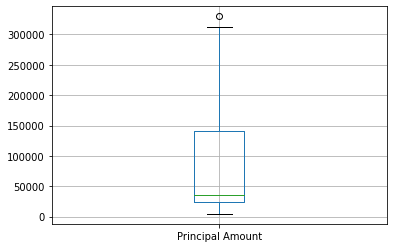

In [209]:
df = new_df[(new_df['Principal Amount'] > lower_limit) & (new_df['Principal Amount'] < upper_limit)]
df.boxplot(column=['Principal Amount'])

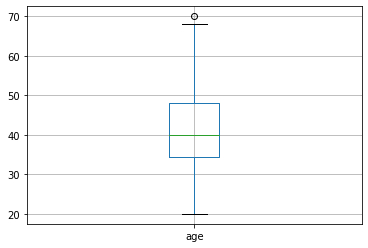

In [210]:
df = new_df[(new_df['age'] > lower_limit) & (new_df['age'] < upper_limit)]
df.boxplot(column=['age'])

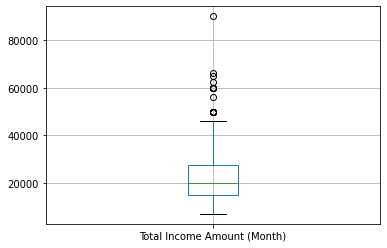

In [211]:
df = new_df[(new_df['Total Income Amount (Month)'] > lower_limit) & (new_df['Total Income Amount (Month)'] < upper_limit)]
df.boxplot(column=['Total Income Amount (Month)'])

In [212]:
cal_Q1 = new_df["Total Income Amount (Month)"].quantile(0.25)
cal_Q3 = new_df["Total Income Amount (Month)"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
cal_IQR

12500.0

In [213]:
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR
print('lower:', lower_limit, 'upper:', upper_limit)

lower: -3750.0 upper: 46250.0


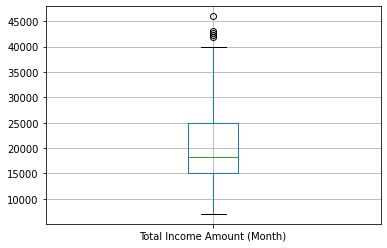

In [214]:
df = new_df[(new_df['Total Income Amount (Month)'] > lower_limit) & (new_df['Total Income Amount (Month)'] < upper_limit)]
df.boxplot(column=['Total Income Amount (Month)'])

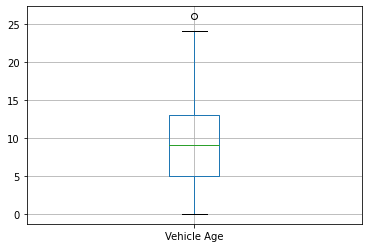

In [215]:
df = new_df[(new_df['Vehicle Age'] > lower_limit) & (new_df['Vehicle Age'] < upper_limit)]
df.boxplot(column=['Vehicle Age'])

In [216]:
new_df['Gender'].value_counts()

F    155
M    144
Name: Gender, dtype: int64

In [217]:
df.describe()

,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,age,Vehicle Age
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,96866.220736,96582.463344,97303.743445,38.287625,22680.729097,2012.414716,157007.692308,41.214047,9.585284
std,100026.049440,100091.573146,101102.860096,17.560181,12521.516248,5.356604,154764.422107,10.463792,5.356604
min,4800.000000,4450.000000,4450.000000,12.000000,7000.000000,1996.000000,12500.000000,20.000000,0.000000
25%,25000.000000,24432.185000,24486.270000,24.000000,15000.000000,2009.000000,36500.000000,34.500000,5.000000
50%,40000.000000,40000.000000,40040.000000,36.000000,20000.000000,2013.000000,72000.000000,40.000000,9.000000
75%,150000.000000,150000.000000,150155.000000,60.000000,27500.000000,2017.000000,249250.000000,48.000000,13.000000
max,677000.000000,677000.000000,693901.290000,60.000000,90000.000000,2022.000000,867000.000000,70.000000,26.000000


#Data Visualize

##Exploratory Data Analysis

###categorical

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


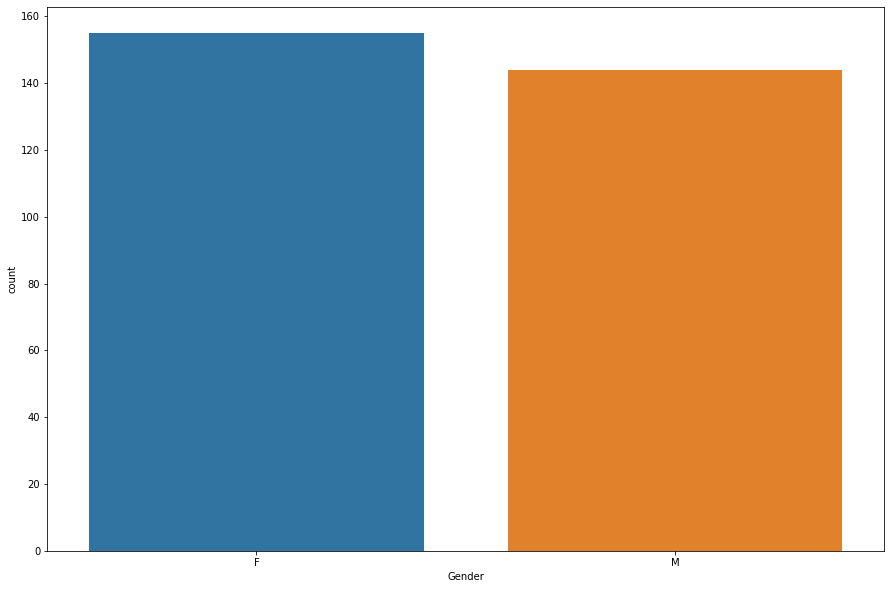

In [218]:
plt.figure(figsize=(15,10))
sns.countplot(df['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3610 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3621 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s

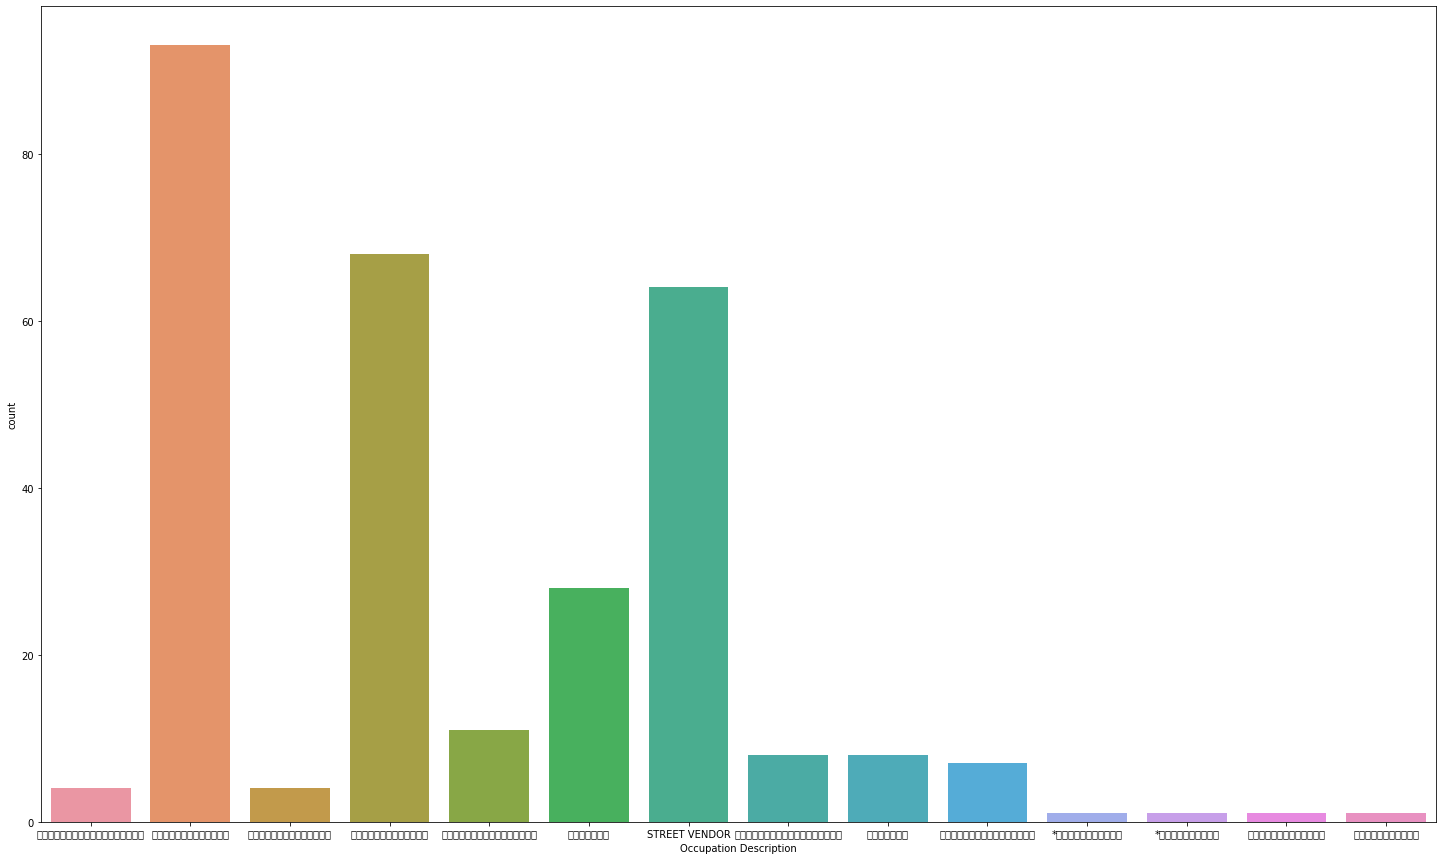

In [219]:
plt.figure(figsize=(25,15))
sns.countplot(df['Occupation Description'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


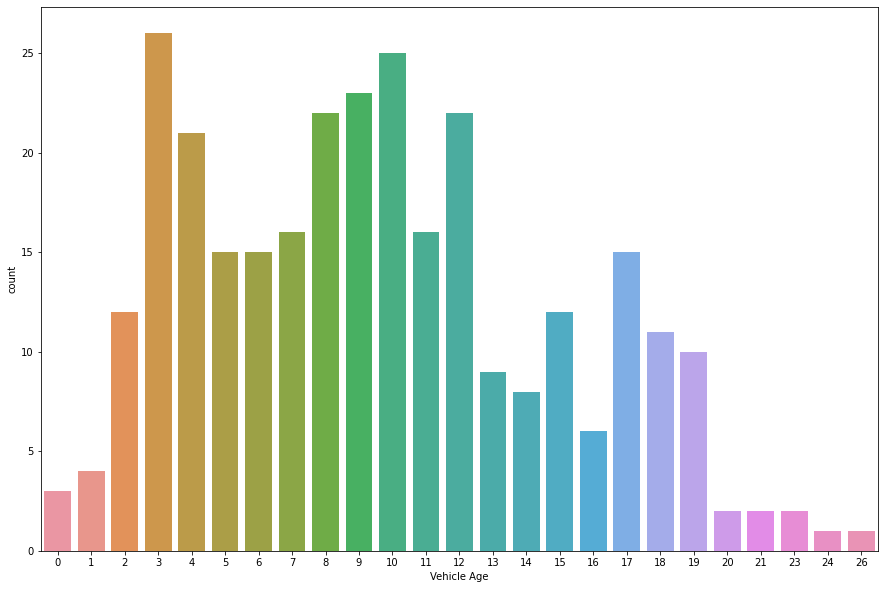

In [220]:
plt.figure(figsize=(15,10))
sns.countplot(df['Vehicle Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


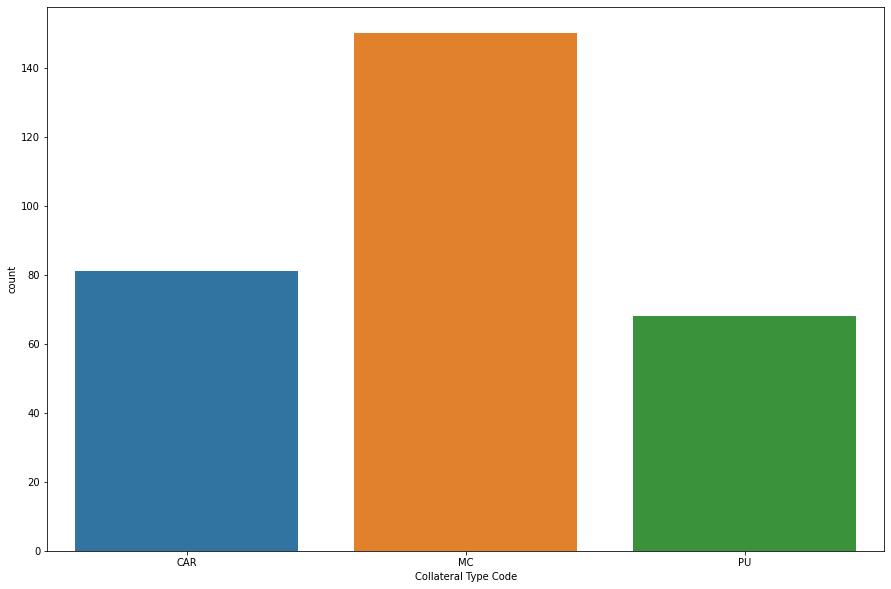

In [221]:
plt.figure(figsize=(15,10))
sns.countplot(df['Collateral Type Code'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


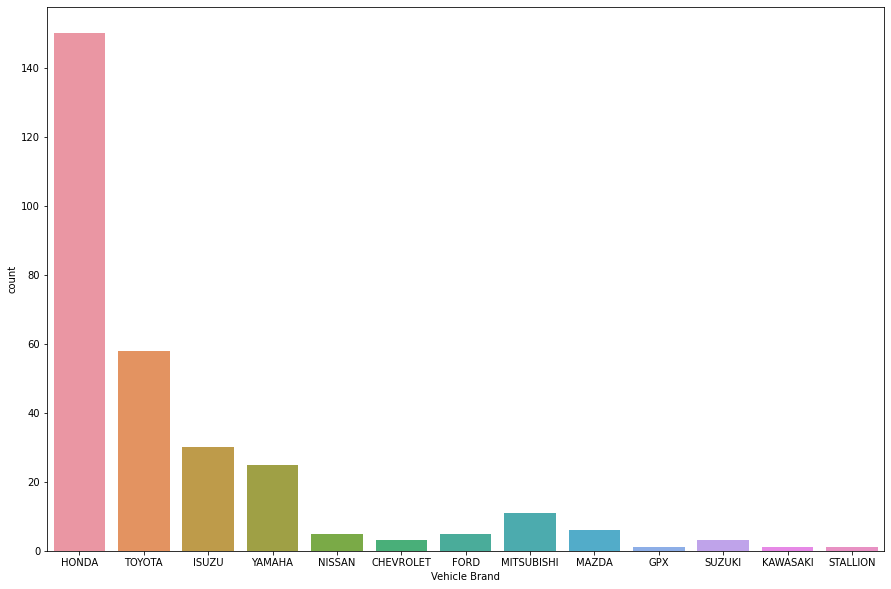

In [222]:
plt.figure(figsize=(15,10))
sns.countplot(df['Vehicle Brand'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


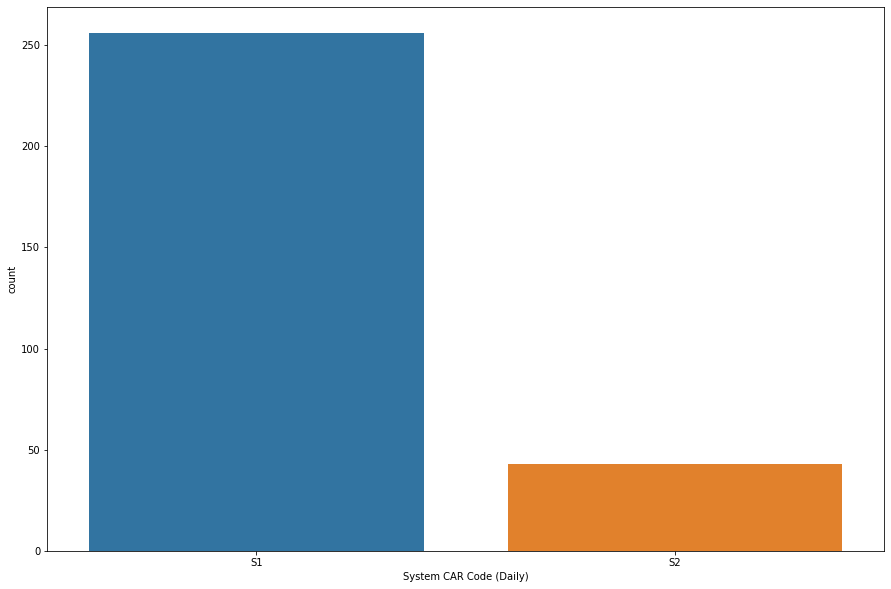

In [223]:
plt.figure(figsize=(15,10))
sns.countplot(df['System CAR Code (Daily)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


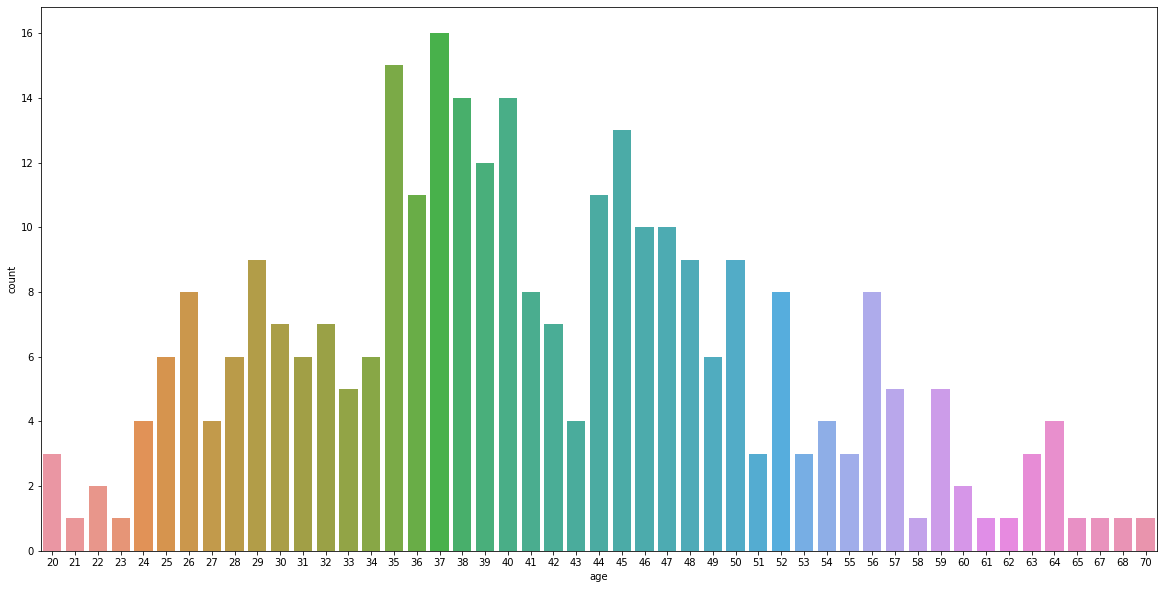

In [224]:
plt.figure(figsize=(20,10))
sns.countplot(df['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


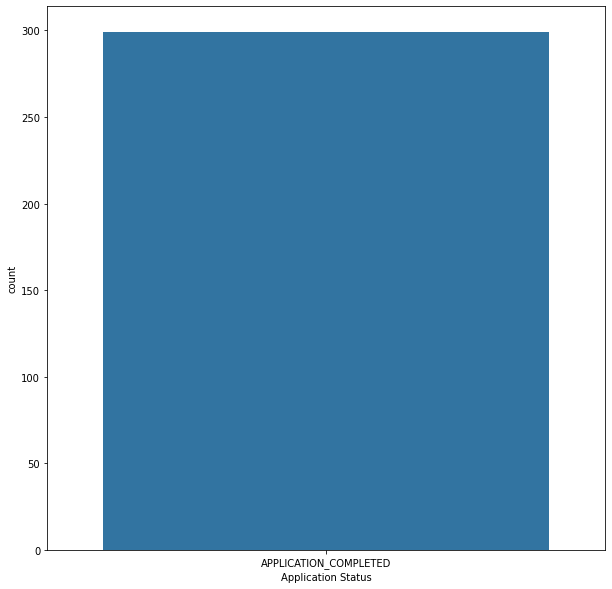

In [225]:
plt.figure(figsize=(10,10))
sns.countplot(df['Application Status'])

###numerical

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


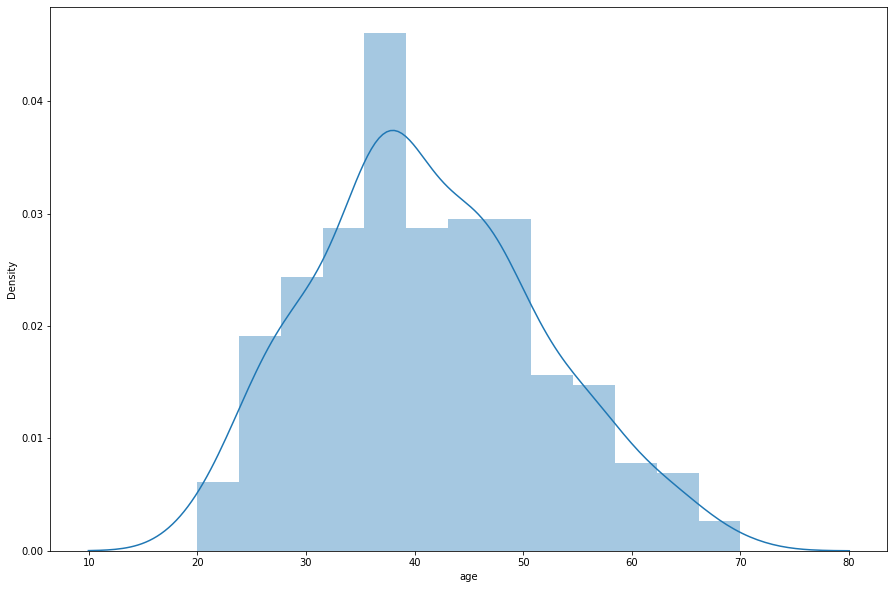

In [226]:
plt.figure(figsize=(15,10))
sns.distplot(df['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


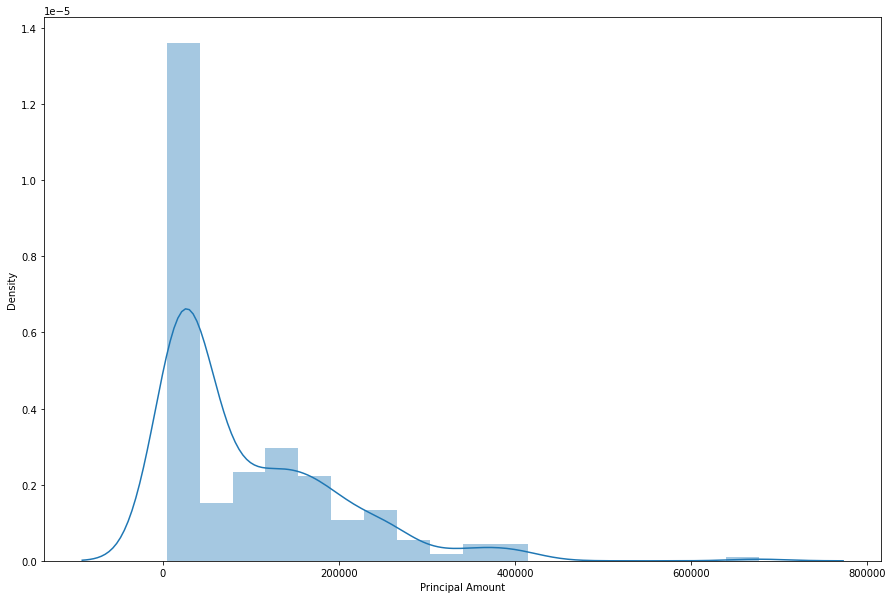

In [227]:
plt.figure(figsize=(15,10))
sns.distplot(df['Principal Amount'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


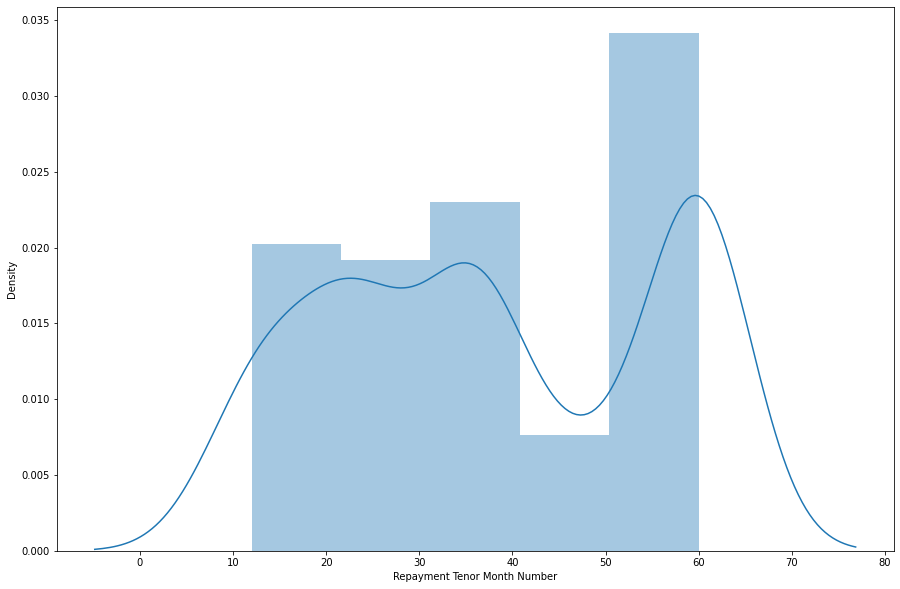

In [228]:
plt.figure(figsize=(15,10))
sns.distplot(df['Repayment Tenor Month Number'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


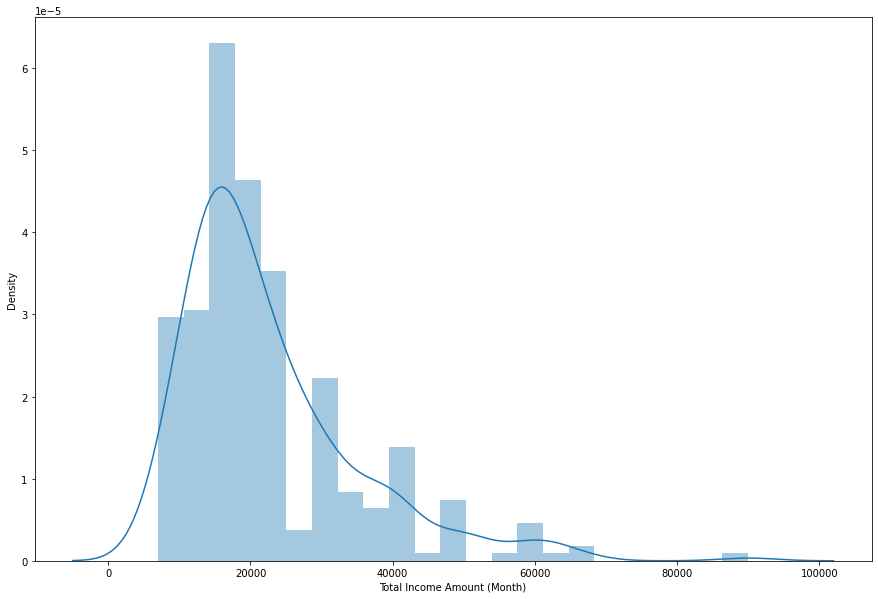

In [229]:
plt.figure(figsize=(15,10))
sns.distplot(df['Total Income Amount (Month)'])

##Coorelation Matrix

In [230]:
df

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25650802ULCR00123,140000.0,140000.00,140140.00,60,F,1987-07-29,บุคลากรทางการแพทย์,25000.0,CAR,...,BR,219000.0,NLG224078258,S1,2022-08-02,S1,PL,APPLICATION_COMPLETED,35,14
1,25650703REUM00005,12500.0,11699.57,11699.57,12,M,1977-10-27,พนักงานบริษัท,15000.0,MC,...,AD,17000.0,NLG224064391,S1,2022-07-03,S1,PL,APPLICATION_COMPLETED,45,13
2,25650726ULCR00084,150000.0,150000.00,150150.00,60,M,1969-05-22,ข้าราชการตำรวจ,42310.0,PU,...,CR,283500.0,NLG224077309,S1,2022-07-26,S1,PL,APPLICATION_COMPLETED,53,13
3,25650802ULMB00025,20000.0,18720.52,18720.52,12,F,1968-01-30,รับจ้างทั่วไป,12000.0,MC,...,CV,42000.0,NLG224078263,S1,2022-08-02,S1,PL,APPLICATION_COMPLETED,54,5
4,25650707ULCR00042,312000.0,312000.00,312000.00,60,M,1978-05-02,ข้าราชการพลเรือน,22139.0,PU,...,CP,528500.0,NLG224074676,S1,2022-07-07,S1,PL,APPLICATION_COMPLETED,44,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,25650726ULMB00141,26000.0,26000.00,26459.80,36,F,1978-06-10,พนักงานบริษัท,16000.0,MC,...,CM,38000.0,NLG224077295,S2,2022-07-26,S2,NPL,APPLICATION_COMPLETED,44,7
295,25650802REUM00051,28500.0,28500.00,28890.62,36,M,1976-01-22,พนักงานรัฐวิสาหกิจ,38000.0,MC,...,DA,38000.0,NLG224078276,S2,2022-08-02,S2,NPL,APPLICATION_COMPLETED,46,3
296,25650803ULCR00007,172000.0,172000.00,174848.19,60,F,1987-01-12,เกษตรกร,30000.0,PU,...,CI,215000.0,NLG224078437,S2,2022-08-03,S2,NPL,APPLICATION_COMPLETED,35,12
297,25650803ULCR00033,270000.0,270000.00,273410.10,60,F,1988-11-10,STREET VENDOR,25000.0,PU,...,CG,337500.0,NLG224078435,S2,2022-08-03,S2,NPL,APPLICATION_COMPLETED,34,13


In [231]:
corr = df.corr()
corr

,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Total Income Amount (Month),Vehicle Release Year,Evaluation Amount,age,Vehicle Age
Principal Approve Amount,1.000000,0.999978,0.999830,0.733852,0.335445,-0.128094,0.909780,0.074486,0.128094
Principal Amount,0.999978,1.000000,0.999865,0.734943,0.334682,-0.128872,0.909614,0.073945,0.128872
Outstanding Balance Amount,0.999830,0.999865,1.000000,0.733860,0.333460,-0.128455,0.908389,0.072364,0.128455
Repayment Tenor Month Number,0.733852,0.734943,0.733860,1.000000,0.201821,-0.306580,0.623725,0.045101,0.306580
Total Income Amount (Month),0.335445,0.334682,0.333460,0.201821,1.000000,-0.115545,0.314024,0.213443,0.115545
Vehicle Release Year,-0.128094,-0.128872,-0.128455,-0.306580,-0.115545,1.000000,-0.122151,-0.226518,-1.000000
Evaluation Amount,0.909780,0.909614,0.908389,0.623725,0.314024,-0.122151,1.000000,0.104391,0.122151
age,0.074486,0.073945,0.072364,0.045101,0.213443,-0.226518,0.104391,1.000000,0.226518
Vehicle Age,0.128094,0.128872,0.128455,0.306580,0.115545,-1.000000,0.122151,0.226518,1.000000


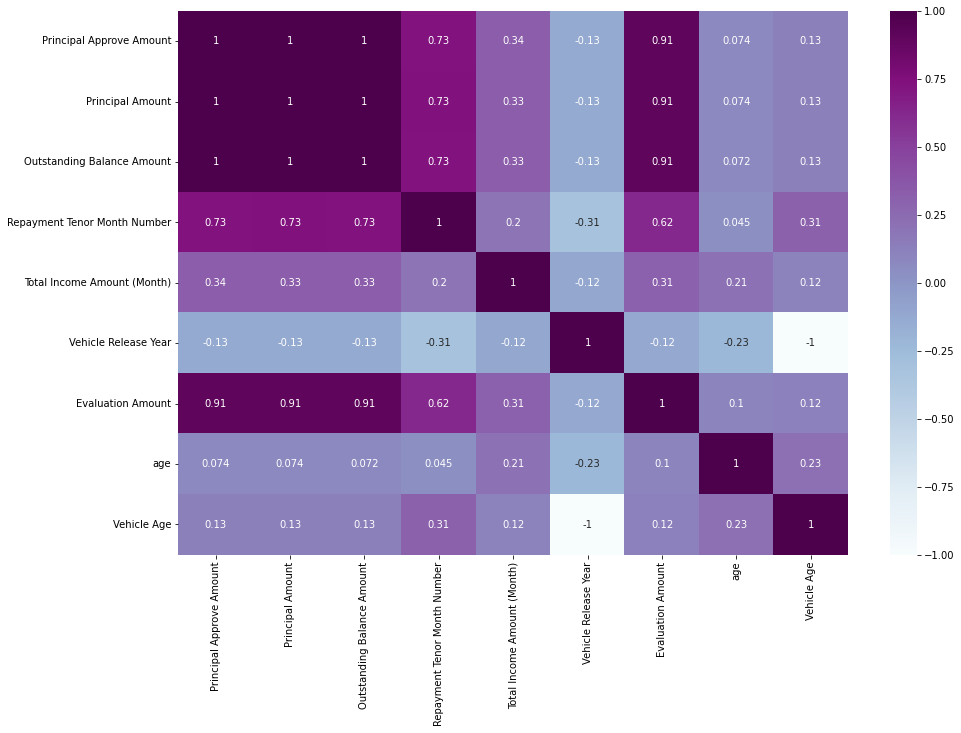

In [232]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap="BuPu")

In [233]:
for i in category:
    print(f'{i}:{new_df[i].unique()}\n')

Collateral Type Code:['CAR' 'MC' 'PU']

Vehicle Release Year:[2008 2009 2017 2016 2019 2007 2010 2013 2011 2014 2015 2012 2018 1999
 2021 2005 1996 2004 2002 2020 2003 2006 2001 2022 1998]

Vehicle Age:[14 13  5  6  3 15 12  9 11  8  7 10  4 23  1 17 26 18 20  2 19 16 21  0
 24]

age:[35 45 53 54 44 49 38 39 41 34 56 36 40 48 63 42 52 32 46 50 20 24 55 64
 59 67 47 29 33 60 28 31 25 37 43 27 30 22 51 57 62 26 21 70 61 68 58 65
 23]

Repayment Tenor Month Number:[60 12 36 24 54 48 18 42 30]

Occupation Description:['บุคลากรทางการแพทย์' 'พนักงานบริษัท' 'ข้าราชการตำรวจ' 'รับจ้างทั่วไป'
 'ข้าราชการพลเรือน' 'เกษตรกร' 'STREET VENDOR' 'พนักงานรัฐวิสาหกิจ'
 'อาจารย์' 'พนักงานส่งเอกสาร' '*นักการเมือง' '*ค้าของเก่า' 'ข้าราชการทหาร'
 'เลี้ยงสัตว์']

System CAR Code (Daily):['S1' 'S2']

DPD:['PL', 'NPL']
Categories (2, object): ['PL' < 'NPL']

Application Status:['APPLICATION_COMPLETED']



In [234]:
for i in category:
    print(f'{i}:{new_df[i].value_counts()}\n')

Collateral Type Code:MC     150
CAR     81
PU      68
Name: Collateral Type Code, dtype: int64

Vehicle Release Year:2019    26
2012    25
2013    23
2010    22
2014    22
2018    21
2011    16
2015    16
2017    15
2016    15
2005    15
2007    12
2020    12
2004    11
2003    10
2009     9
2008     8
2006     6
2021     4
2022     3
2002     2
1999     2
2001     2
1996     1
1998     1
Name: Vehicle Release Year, dtype: int64

Vehicle Age:3     26
10    25
9     23
12    22
8     22
4     21
11    16
7     16
5     15
6     15
17    15
15    12
2     12
18    11
19    10
13     9
14     8
16     6
1      4
0      3
20     2
23     2
21     2
26     1
24     1
Name: Vehicle Age, dtype: int64

age:37    16
35    15
38    14
40    14
45    13
39    12
36    11
44    11
46    10
47    10
48     9
29     9
50     9
52     8
26     8
56     8
41     8
42     7
32     7
30     7
34     6
25     6
31     6
28     6
49     6
57     5
33     5
59     5
64     4
24     4
43     4
27     4
54  

In [235]:
train_df = df.drop(columns=['Application Number']) ## Dropping Application Number
categorical_columns = ['Gender','Occupation Description','Vehicle Age','Collateral Type Code','Vehicle Brand','System CAR Code (Daily)','age','Application Status']

print(categorical_columns)
numerical_columns = ['age','Principal Amount', 'Repayment Tenor Month Number','Total Income Amount (Month)']
print(numerical_columns)

['Gender', 'Occupation Description', 'Vehicle Age', 'Collateral Type Code', 'Vehicle Brand', 'System CAR Code (Daily)', 'age', 'Application Status']
['age', 'Principal Amount', 'Repayment Tenor Month Number', 'Total Income Amount (Month)']


In [236]:
df

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25650802ULCR00123,140000.0,140000.00,140140.00,60,F,1987-07-29,บุคลากรทางการแพทย์,25000.0,CAR,...,BR,219000.0,NLG224078258,S1,2022-08-02,S1,PL,APPLICATION_COMPLETED,35,14
1,25650703REUM00005,12500.0,11699.57,11699.57,12,M,1977-10-27,พนักงานบริษัท,15000.0,MC,...,AD,17000.0,NLG224064391,S1,2022-07-03,S1,PL,APPLICATION_COMPLETED,45,13
2,25650726ULCR00084,150000.0,150000.00,150150.00,60,M,1969-05-22,ข้าราชการตำรวจ,42310.0,PU,...,CR,283500.0,NLG224077309,S1,2022-07-26,S1,PL,APPLICATION_COMPLETED,53,13
3,25650802ULMB00025,20000.0,18720.52,18720.52,12,F,1968-01-30,รับจ้างทั่วไป,12000.0,MC,...,CV,42000.0,NLG224078263,S1,2022-08-02,S1,PL,APPLICATION_COMPLETED,54,5
4,25650707ULCR00042,312000.0,312000.00,312000.00,60,M,1978-05-02,ข้าราชการพลเรือน,22139.0,PU,...,CP,528500.0,NLG224074676,S1,2022-07-07,S1,PL,APPLICATION_COMPLETED,44,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,25650726ULMB00141,26000.0,26000.00,26459.80,36,F,1978-06-10,พนักงานบริษัท,16000.0,MC,...,CM,38000.0,NLG224077295,S2,2022-07-26,S2,NPL,APPLICATION_COMPLETED,44,7
295,25650802REUM00051,28500.0,28500.00,28890.62,36,M,1976-01-22,พนักงานรัฐวิสาหกิจ,38000.0,MC,...,DA,38000.0,NLG224078276,S2,2022-08-02,S2,NPL,APPLICATION_COMPLETED,46,3
296,25650803ULCR00007,172000.0,172000.00,174848.19,60,F,1987-01-12,เกษตรกร,30000.0,PU,...,CI,215000.0,NLG224078437,S2,2022-08-03,S2,NPL,APPLICATION_COMPLETED,35,12
297,25650803ULCR00033,270000.0,270000.00,273410.10,60,F,1988-11-10,STREET VENDOR,25000.0,PU,...,CG,337500.0,NLG224078435,S2,2022-08-03,S2,NPL,APPLICATION_COMPLETED,34,13


IndexError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3610 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3621 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s

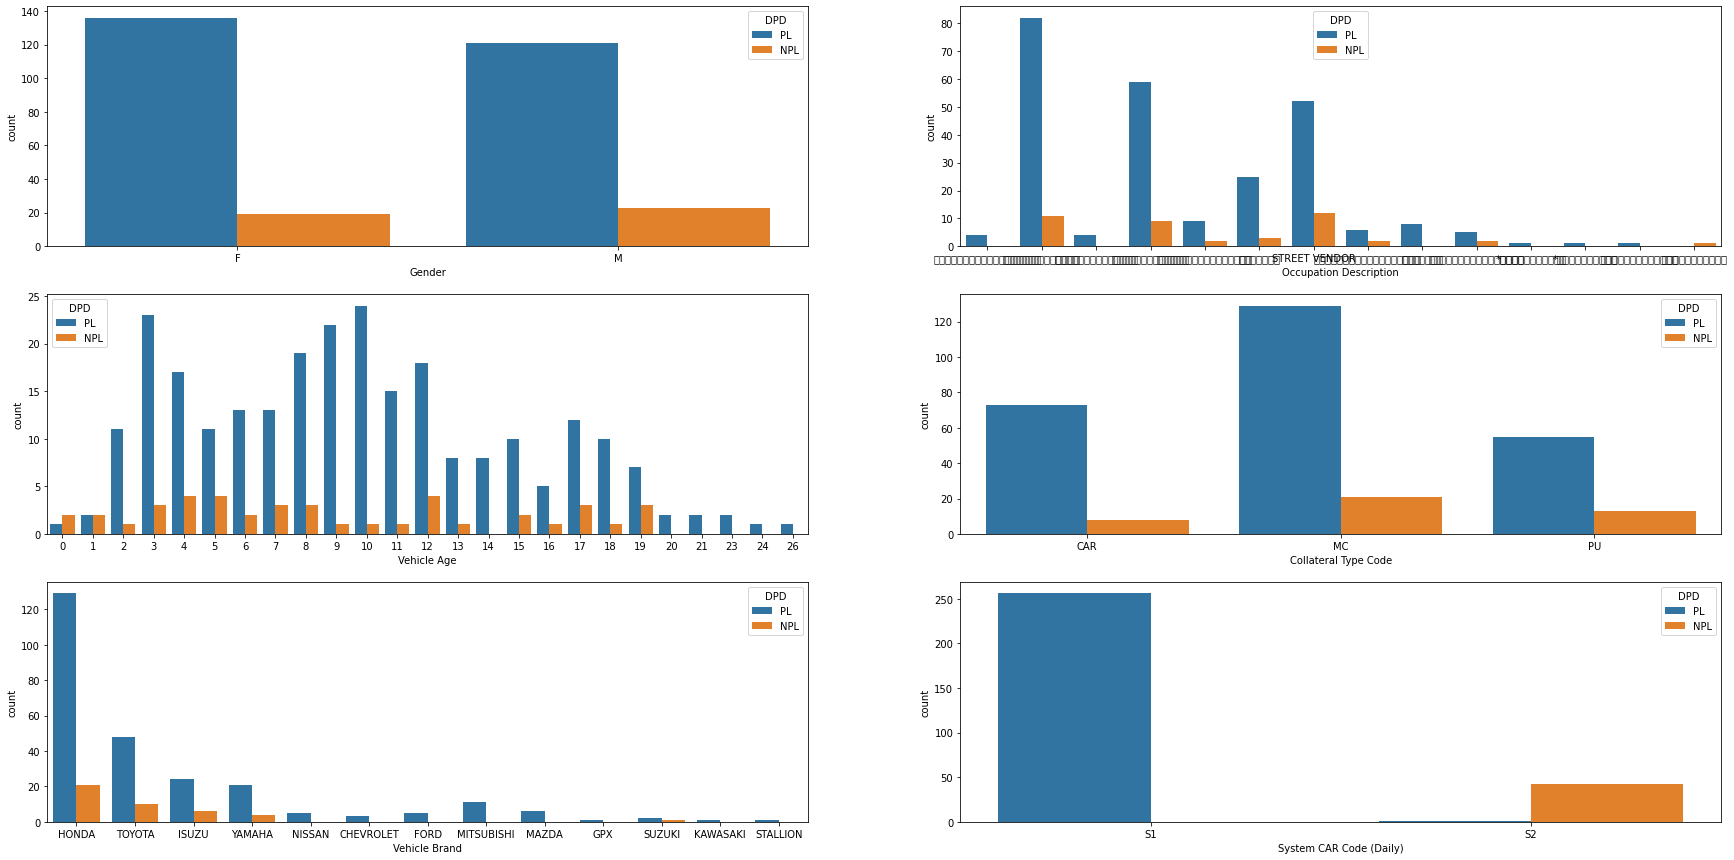

In [237]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(3,2,figsize=(30,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='DPD',ax=axes[row,col])


#plt.subplots_adjust(hspace=1)

IndexError: ignored

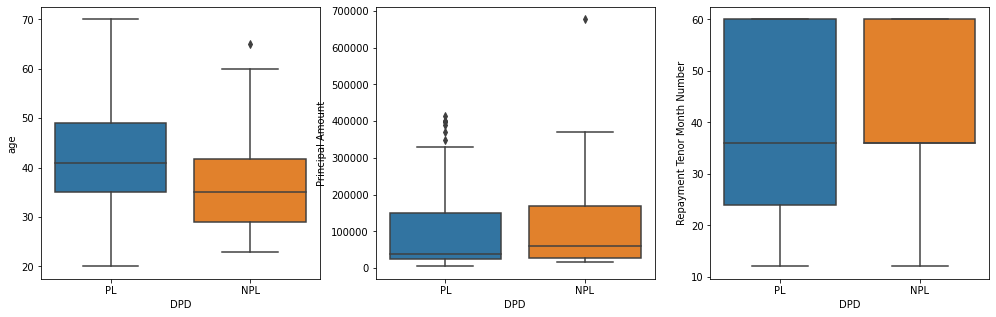

In [238]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=train_df,x='DPD',ax=axes[idx])

print(train_df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

In [239]:
cols = ['Principal Approve Amount','Principal Amount','Total Income Amount (Month)','Repayment Tenor Month Number','age','Vehicle Age']

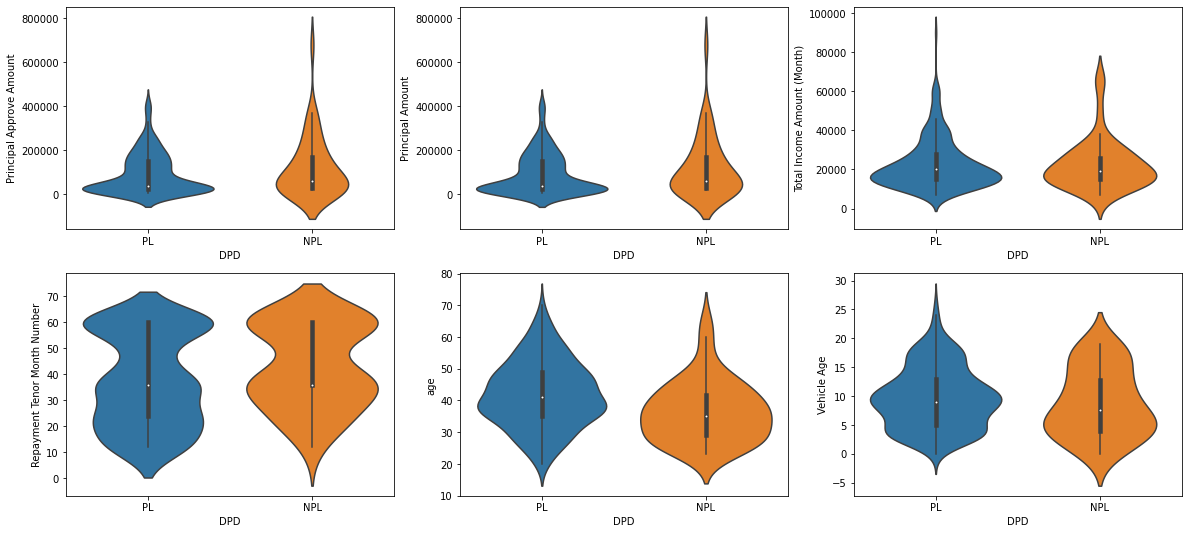

In [240]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,9))
ax = ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='DPD', y=col, data=df, ax=ax[i])

#Decision Tree

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [242]:
df.columns

Index(['Application Number', 'Principal Approve Amount', 'Principal Amount',
       'Outstanding Balance Amount', 'Repayment Tenor Month Number', 'Gender',
       'DOB', 'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'Vehicle Model',
       'Vehicle Release Year', 'Vehicle Sub Model', 'Evaluation Amount',
       'Insurance Policy Number', 'System CAR Code (Daily)',
       'System CAR Code Date', 'Final CAR Code Previous Month', 'DPD',
       'Application Status', 'age', 'Vehicle Age'],
      dtype='object')

In [ ]:
sns.pairplot(df,
             kind='reg',
             plot_kws={'scatter_kws':{'alpha':0.4},
                       'line_kws':{'color':'orange'}},
             diag_kws={'color':'green','alpha':.2});

In [261]:
X = df3.drop(columns=['DPD'], axis=1)
y = df3['DPD']

In [262]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

##Label Encoder

In [243]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Occupation Description','Collateral Type Code','Vehicle Brand']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [244]:
df.head()

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25650802ULCR00123,140000.0,140000.00,140140.00,60,0,1987-07-29,6,25000.0,0,...,BR,219000.0,NLG224078258,S1,2022-08-02,S1,PL,APPLICATION_COMPLETED,35,14
1,25650703REUM00005,12500.0,11699.57,11699.57,12,1,1977-10-27,7,15000.0,1,...,AD,17000.0,NLG224064391,S1,2022-07-03,S1,PL,APPLICATION_COMPLETED,45,13
2,25650726ULCR00084,150000.0,150000.00,150150.00,60,1,1969-05-22,3,42310.0,2,...,CR,283500.0,NLG224077309,S1,2022-07-26,S1,PL,APPLICATION_COMPLETED,53,13
3,25650802ULMB00025,20000.0,18720.52,18720.52,12,0,1968-01-30,10,12000.0,1,...,CV,42000.0,NLG224078263,S1,2022-08-02,S1,PL,APPLICATION_COMPLETED,54,5
4,25650707ULCR00042,312000.0,312000.00,312000.00,60,1,1978-05-02,5,22139.0,2,...,CP,528500.0,NLG224074676,S1,2022-07-07,S1,PL,APPLICATION_COMPLETED,44,6


In [251]:
cols = ['Application Number','Insurance Policy Number', 'System CAR Code (Daily)',
       'System CAR Code Date', 'Final CAR Code Previous Month','Application Status','DOB','Vehicle Model','Vehicle Sub Model']
df3 = df.drop(columns=cols, axis=1)

In [255]:
df3

,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Release Year,Evaluation Amount,DPD,age,Vehicle Age
0,140000.0,140000.00,140140.00,60,0,6,25000.0,0,3,2008,219000.0,PL,35,14
1,12500.0,11699.57,11699.57,12,1,7,15000.0,1,3,2009,17000.0,PL,45,13
2,150000.0,150000.00,150150.00,60,1,3,42310.0,2,11,2009,283500.0,PL,53,13
3,20000.0,18720.52,18720.52,12,0,10,12000.0,1,3,2017,42000.0,PL,54,5
4,312000.0,312000.00,312000.00,60,1,5,22139.0,2,4,2016,528500.0,PL,44,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,26000.0,26000.00,26459.80,36,0,7,16000.0,1,3,2015,38000.0,NPL,44,7
295,28500.0,28500.00,28890.62,36,1,8,38000.0,1,3,2019,38000.0,NPL,46,3
296,172000.0,172000.00,174848.19,60,0,12,30000.0,2,11,2010,215000.0,NPL,35,12
297,270000.0,270000.00,273410.10,60,0,2,25000.0,2,4,2009,337500.0,NPL,34,13


In [256]:
corr = df3.corr()
corr

,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Release Year,Evaluation Amount,age,Vehicle Age
Principal Approve Amount,1.000000,0.999978,0.999830,0.733852,0.127032,-0.101534,0.335445,0.149946,0.147777,-0.128094,0.909780,0.074486,0.128094
Principal Amount,0.999978,1.000000,0.999865,0.734943,0.126909,-0.101531,0.334682,0.149370,0.147603,-0.128872,0.909614,0.073945,0.128872
Outstanding Balance Amount,0.999830,0.999865,1.000000,0.733860,0.125328,-0.101571,0.333460,0.150334,0.146889,-0.128455,0.908389,0.072364,0.128455
Repayment Tenor Month Number,0.733852,0.734943,0.733860,1.000000,0.068949,-0.119246,0.201821,-0.008194,0.160746,-0.306580,0.623725,0.045101,0.306580
Gender,0.127032,0.126909,0.125328,0.068949,1.000000,0.039152,0.140486,0.173477,0.087275,-0.015920,0.130603,0.123779,0.015920
Occupation Description,-0.101534,-0.101531,-0.101571,-0.119246,0.039152,1.000000,-0.216120,0.024418,-0.075309,0.031405,-0.092506,-0.068123,-0.031405
Total Income Amount (Month),0.335445,0.334682,0.333460,0.201821,0.140486,-0.216120,1.000000,0.057860,0.160928,-0.115545,0.314024,0.213443,0.115545
Collateral Type Code,0.149946,0.149370,0.150334,-0.008194,0.173477,0.024418,0.057860,1.000000,0.022253,0.136156,0.208838,0.090326,-0.136156
Vehicle Brand,0.147777,0.147603,0.146889,0.160746,0.087275,-0.075309,0.160928,0.022253,1.000000,-0.270914,0.177435,0.174632,0.270914
Vehicle Release Year,-0.128094,-0.128872,-0.128455,-0.306580,-0.015920,0.031405,-0.115545,0.136156,-0.270914,1.000000,-0.122151,-0.226518,-1.000000


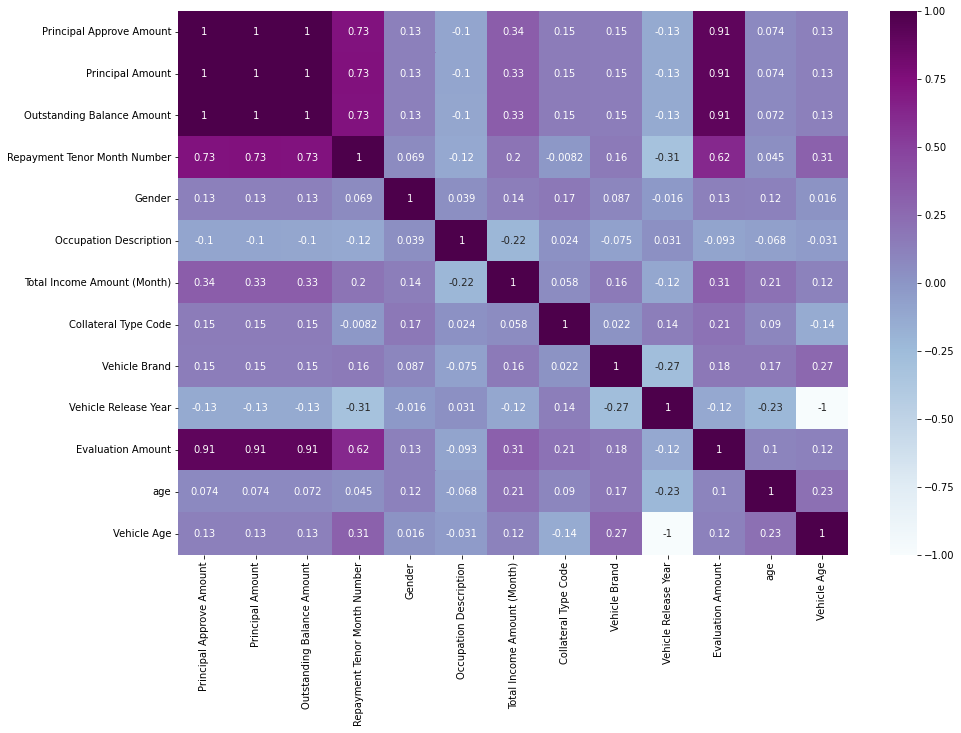

In [257]:
corr = df3.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap="BuPu")

In [260]:
from sklearn import tree

In [ ]:
model=DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
X_train.columns

Index(['Principal Approve Amount', 'Principal Amount',
       'Total Income Amount (Month)', 'Repayment Tenor Month Number', 'age',
       'Vehicle Age'],
      dtype='object')

##Feature Importances

In [ ]:
model.feature_importances_

array([0.12228178, 0.10454033, 0.18289428, 0.06513502, 0.32857873,
       0.19656986])

In [ ]:
fs = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
fs

age                             0.328579
Vehicle Age                     0.196570
Total Income Amount (Month)     0.182894
Principal Approve Amount        0.122282
Principal Amount                0.104540
Repayment Tenor Month Number    0.065135
dtype: float64

In [ ]:
fs.sum()

0.9999999999999999

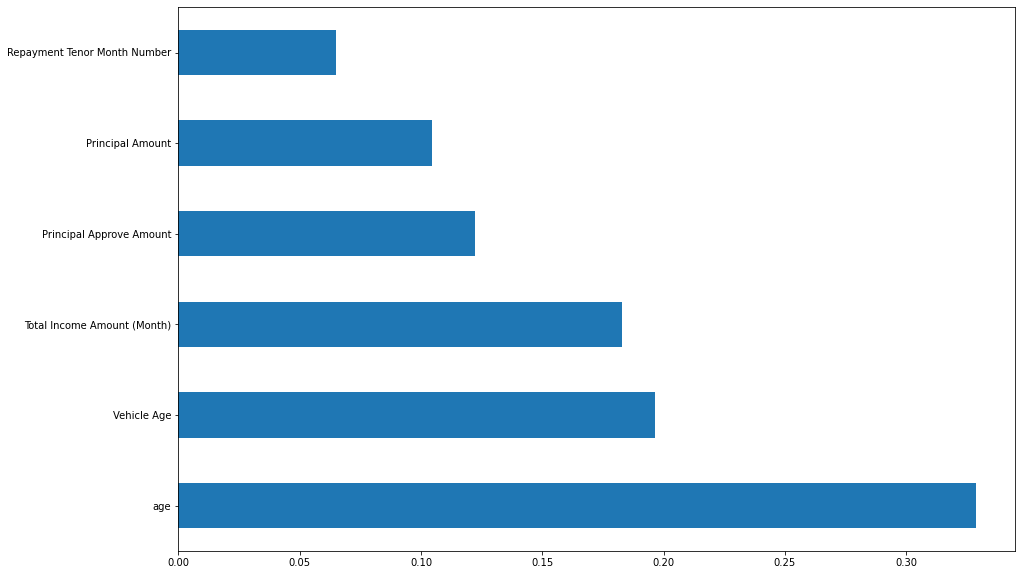

In [ ]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

##Train Test Split

In [ ]:
y_train.value_counts()

PL     205
NPL     34
Name: DPD, dtype: int64

In [ ]:
X = df[['Vehicle Age','Principal Approve Amount','Principal Amount','Repayment Tenor Month Number','Repayment Tenor Month Number','age','Total Income Amount (Month)']]
y = df['DPD']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X ,y ,test_size=0.3, random_state=0)
X_train.shape

(209, 7)

In [ ]:
'''#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc = sc_X.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)'''

'#feature scaling\nfrom sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nsc = sc_X.fit(X_train)\nX_train = sc.transform(X_train)\nX_test = sc.transform(X_test)'

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
classifier = model.fit(X_train,y_train)
classifier

DecisionTreeClassifier(criterion='entropy')

In [ ]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 0.7111111111111111


[Text(0.36666666666666664, 0.9615384615384616, 'node #0\nage <= 35.5\nentropy = 0.593\nsamples = 209\nvalue = [30, 179]\nclass = PL'),
 Text(0.08333333333333333, 0.8846153846153846, 'node #1\nTotal Income Amount (Month) <= 9500.0\nentropy = 0.841\nsamples = 63\nvalue = [17, 46]\nclass = PL'),
 Text(0.05, 0.8076923076923077, 'node #2\nentropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = NPL'),
 Text(0.11666666666666667, 0.8076923076923077, 'node #3\nTotal Income Amount (Month) <= 14500.0\nentropy = 0.784\nsamples = 60\nvalue = [14, 46]\nclass = PL'),
 Text(0.08333333333333333, 0.7307692307692307, 'node #4\nentropy = 0.0\nsamples = 11\nvalue = [0, 11]\nclass = PL'),
 Text(0.15, 0.7307692307692307, 'node #5\nRepayment Tenor Month Number <= 15.0\nentropy = 0.863\nsamples = 49\nvalue = [14, 35]\nclass = PL'),
 Text(0.11666666666666667, 0.6538461538461539, 'node #6\nentropy = 0.0\nsamples = 8\nvalue = [0, 8]\nclass = PL'),
 Text(0.18333333333333332, 0.6538461538461539, 'node #7\nVehicle Age <

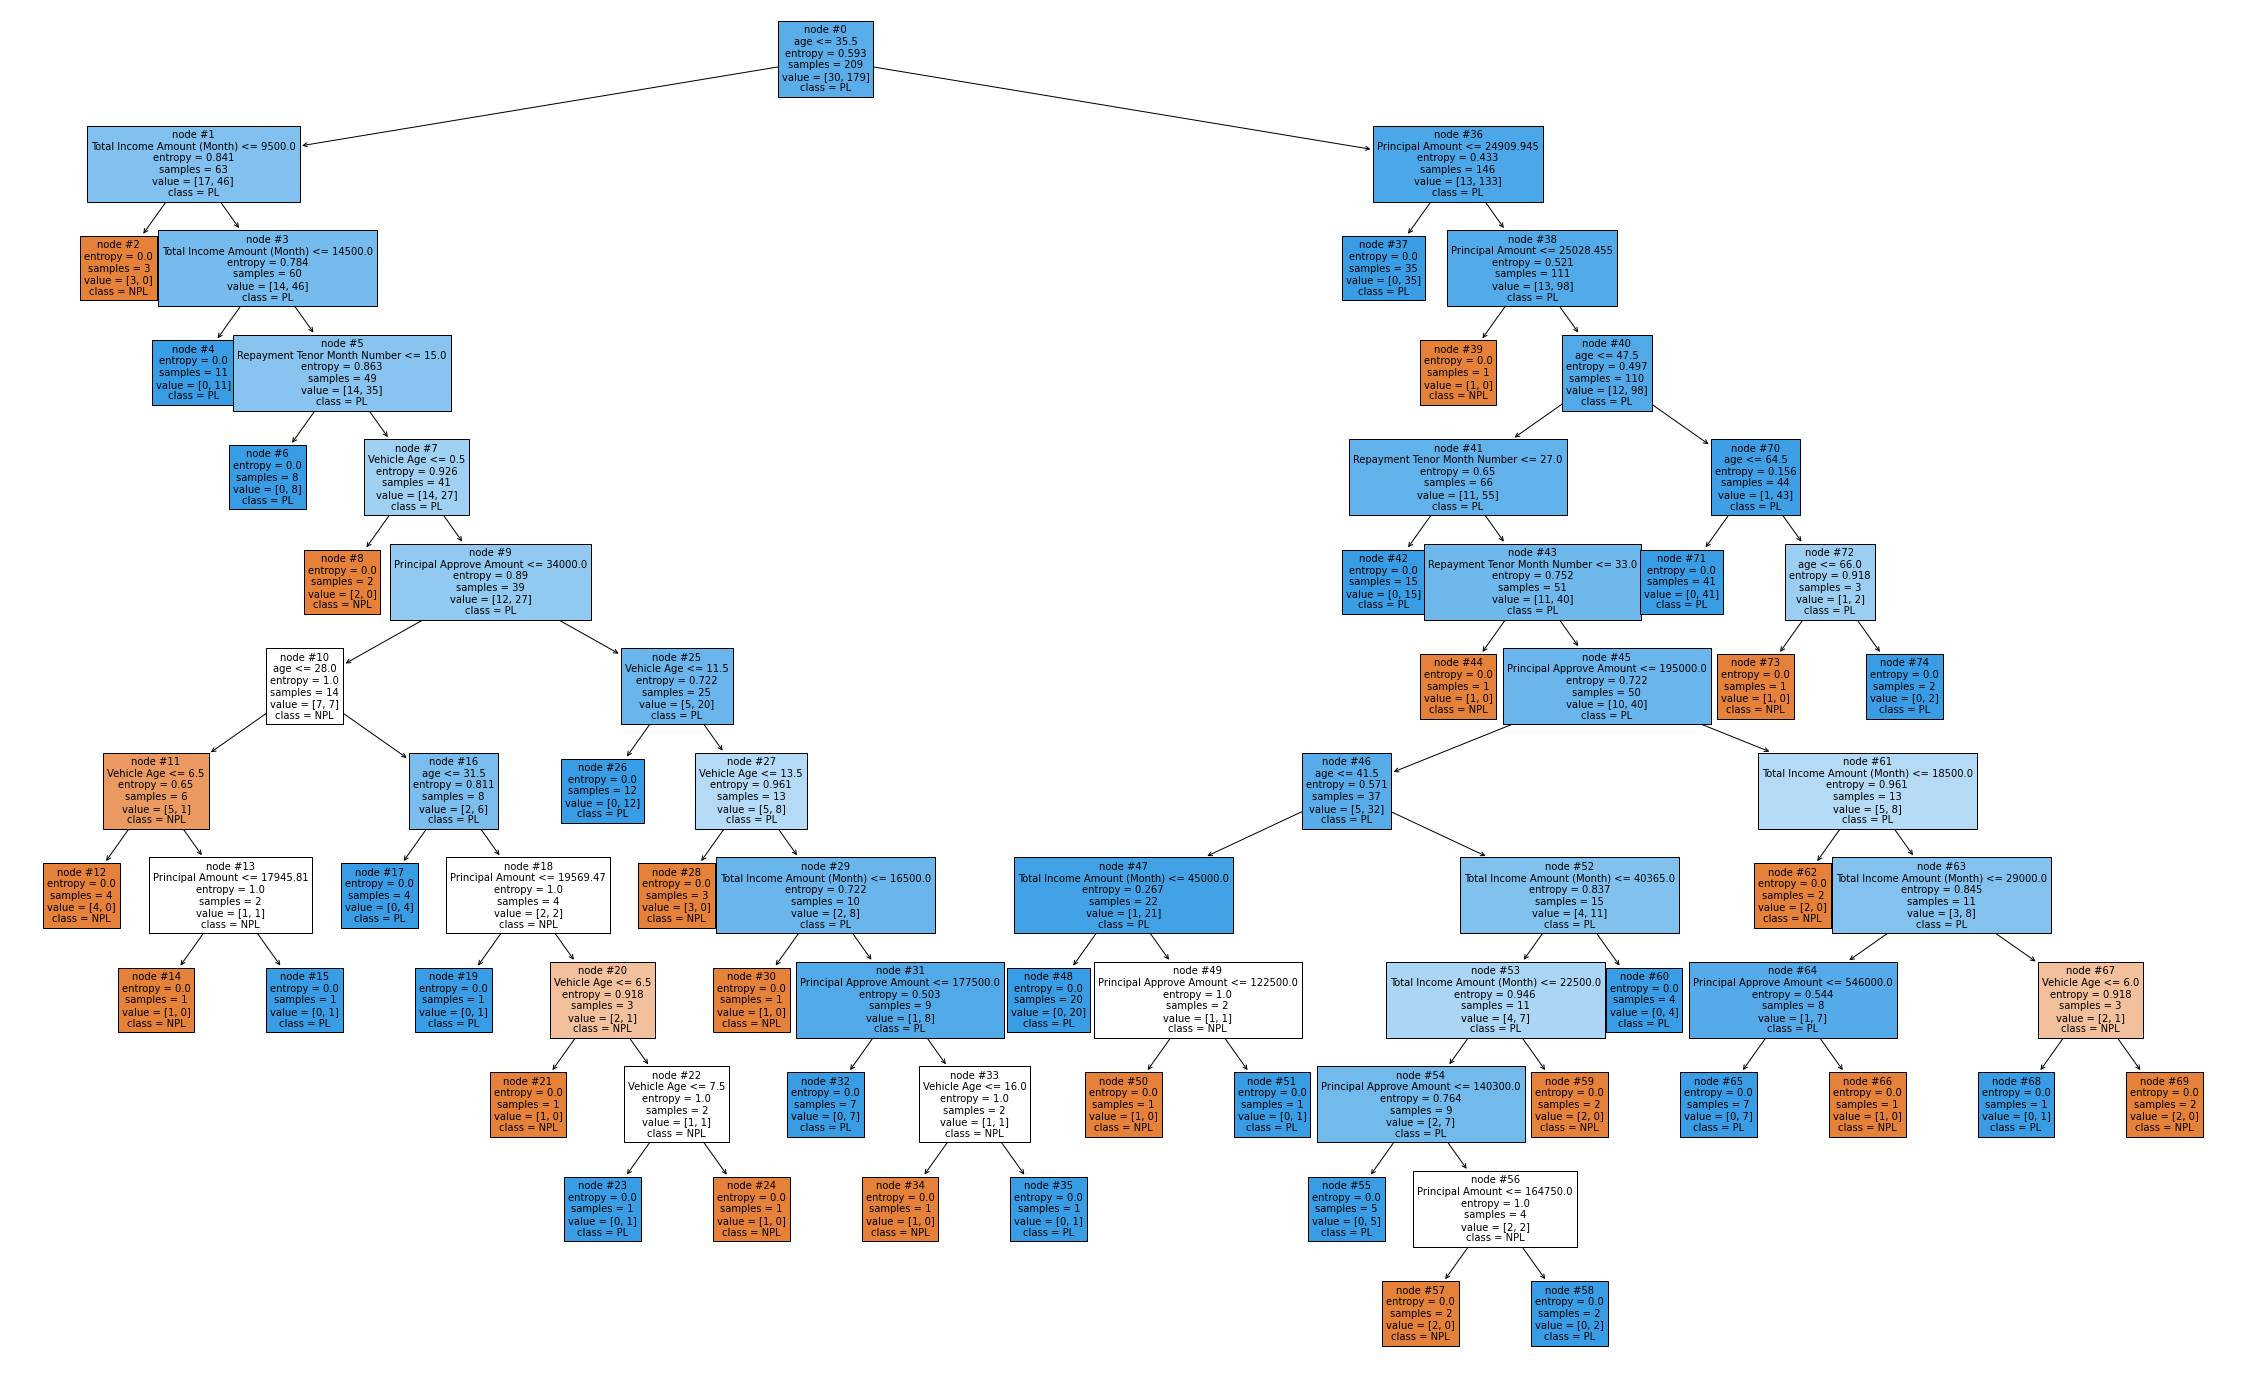

In [ ]:
from sklearn import tree
plt.figure(figsize=(40,25))
tree.plot_tree(classifier, 
                   feature_names=['Vehicle Age','Principal Approve Amount','Principal Amount','Repayment Tenor Month Number','Repayment Tenor Month Number','age','Total Income Amount (Month)'],  
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True,fontsize=10)

In [ ]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)
#Predict the response for test dataset
classifier = classifier.fit(X_train, y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


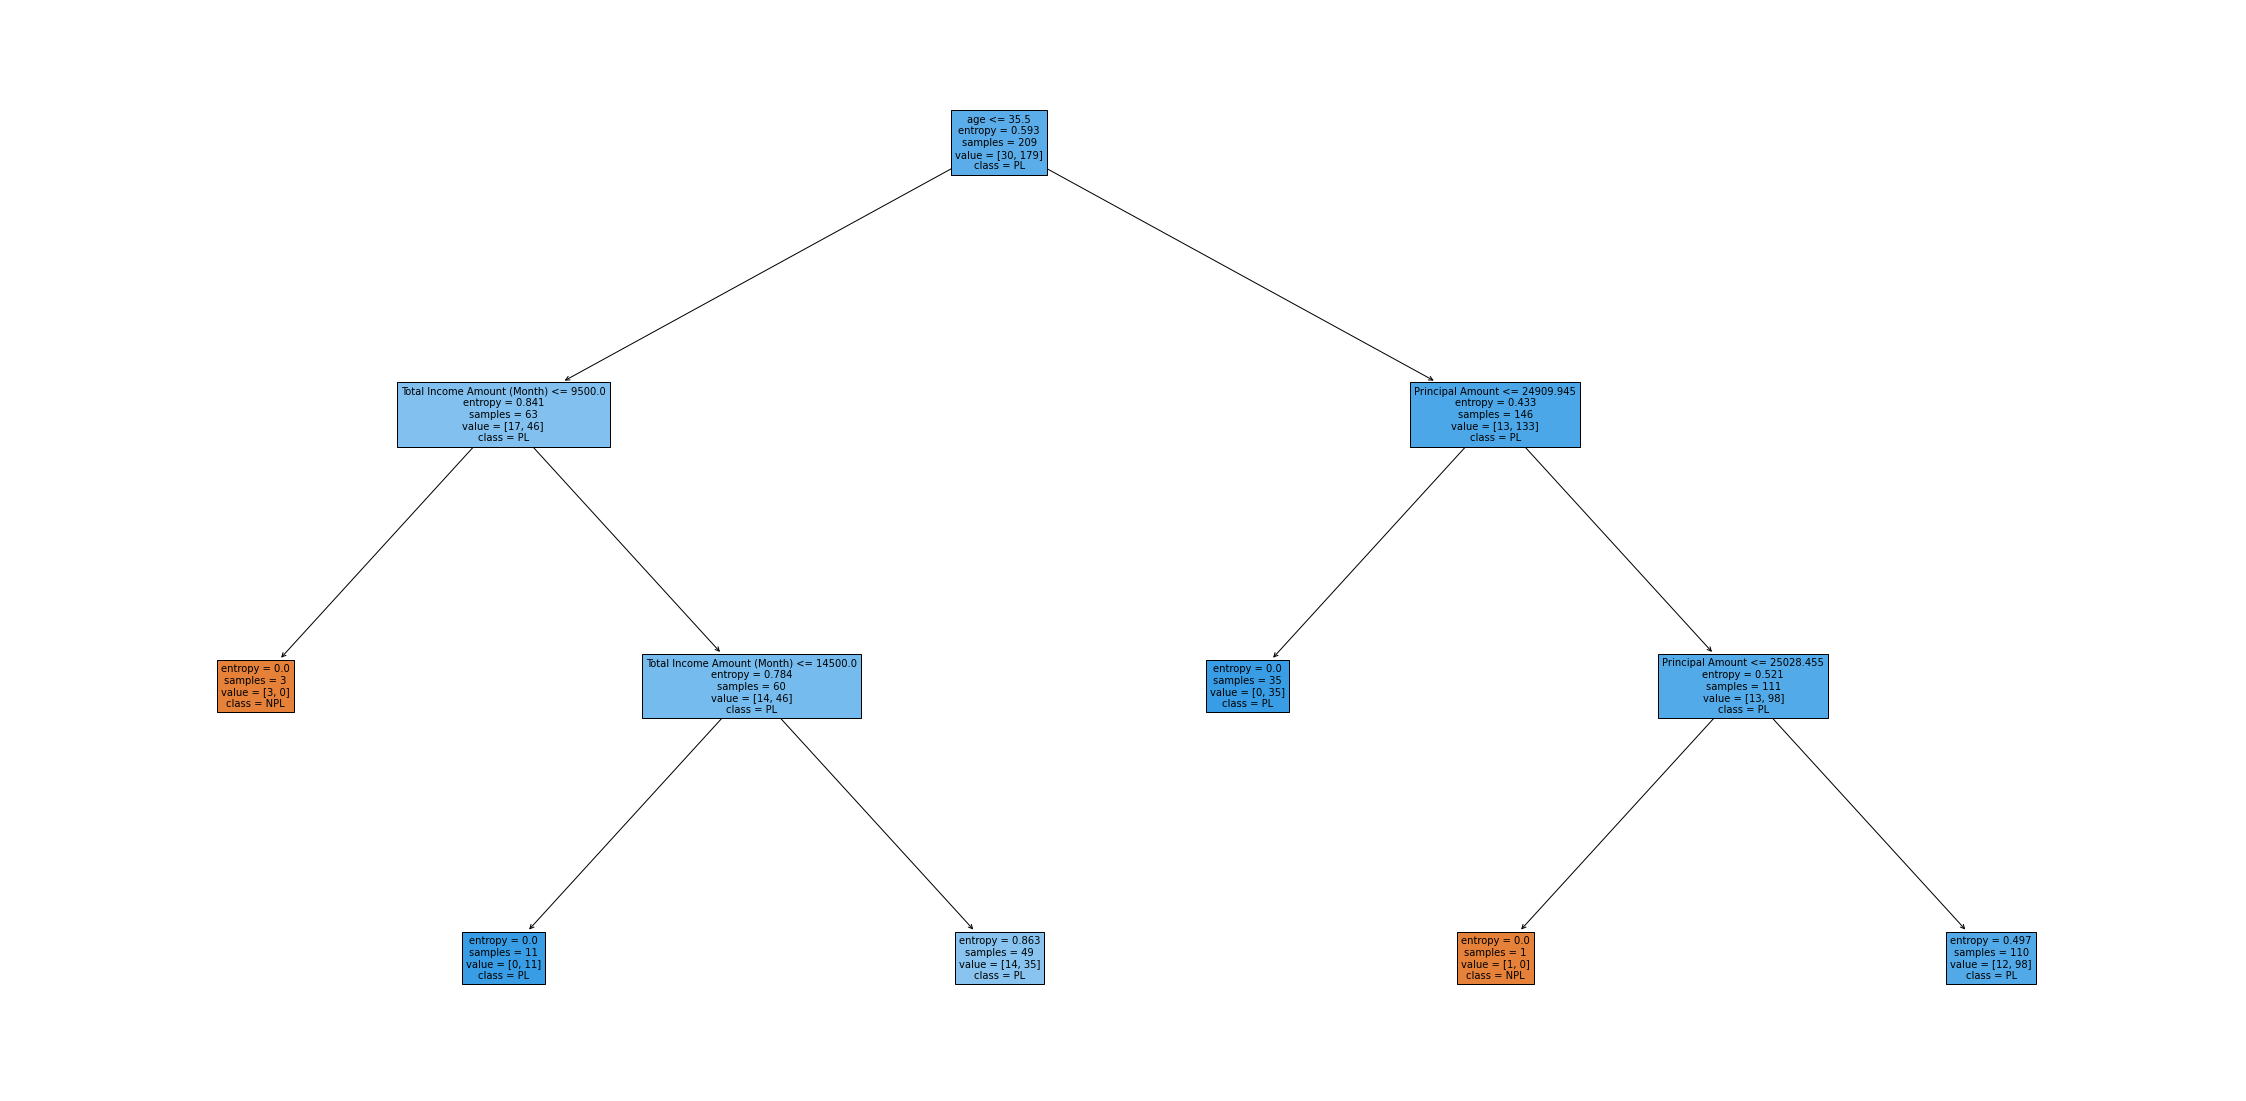

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Vehicle Age','Principal Approve Amount','Principal Amount','Repayment Tenor Month Number','Repayment Tenor Month Number','age','Total Income Amount (Month)'],  
                   class_names=['NPL','PL'],
                   filled=True, fontsize=10)

In [ ]:
import graphviz

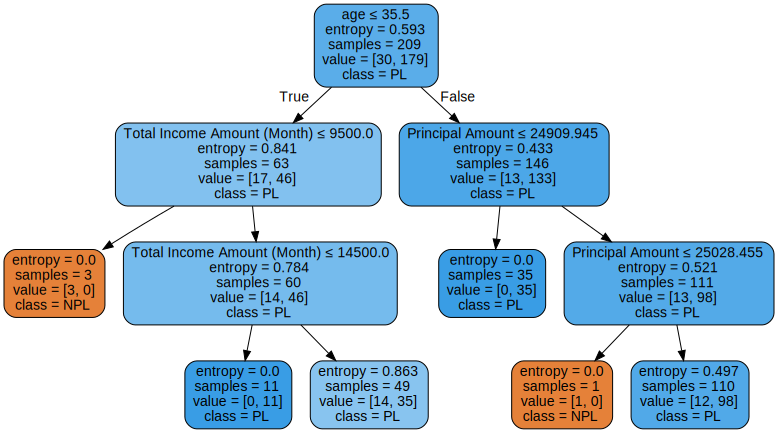

In [ ]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Vehicle Age','Principal Approve Amount','Principal Amount','Repayment Tenor Month Number','Repayment Tenor Month Number','age','Total Income Amount (Month)'],  
                                class_names=['NPL','PL'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
#df.to_csv('/content/drive/MyDrive/Colab Notebooks/IS/chaiyo22.csv')

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics

In [ ]:
model = RandomForestClassifier(n_estimators=250, random_state=7)
classifier = model.fit(X_train,y_train)
classifier

RandomForestClassifier(n_estimators=250, random_state=7)

In [ ]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 0.8444444444444444


In [ ]:
model.feature_importances_

array([0.16227189, 0.17157688, 0.18710825, 0.04471605, 0.04623828,
       0.22205462, 0.16603404])

In [ ]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = RandomForestClassifier(n_estimators=250, random_state=7)
#Predict the response for test dataset
classifier = classifier.fit(X_train, y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8444444444444444


#Decision Tree 2

In [ ]:
df2 = df.copy()

In [ ]:
df2.to_csv('/content/drive/MyDrive/Colab Notebooks/IS/chaiyo22.csv')

In [ ]:
df2.head(5)

,Application Number,Principal Approve Amount,Principal Amount,Outstanding Balance Amount,Repayment Tenor Month Number,Gender,DOB,Occupation Description,Total Income Amount (Month),Collateral Type Code,...,Vehicle Sub Model,Evaluation Amount,Insurance Policy Number,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,Application Status,age,Vehicle Age
0,25650802ULCR00123,140000.0,140000.00,140140.00,60,F,1987-07-29,บุคลากรทางการแพทย์,25000.0,CAR,...,BR,219000.0,NLG224078258,S1,2022-08-02,S1,PL,APPLICATION_COMPLETED,35,14
1,25650703REUM00005,12500.0,11699.57,11699.57,12,M,1977-10-27,พนักงานบริษัท,15000.0,MC,...,AD,17000.0,NLG224064391,S1,2022-07-03,S1,PL,APPLICATION_COMPLETED,45,13
2,25650726ULCR00084,150000.0,150000.00,150150.00,60,M,1969-05-22,ข้าราชการตำรวจ,42310.0,PU,...,CR,283500.0,NLG224077309,S1,2022-07-26,S1,PL,APPLICATION_COMPLETED,53,13
3,25650802ULMB00025,20000.0,18720.52,18720.52,12,F,1968-01-30,รับจ้างทั่วไป,12000.0,MC,...,CV,42000.0,NLG224078263,S1,2022-08-02,S1,PL,APPLICATION_COMPLETED,54,5
4,25650707ULCR00042,312000.0,312000.00,312000.00,60,M,1978-05-02,ข้าราชการพลเรือน,22139.0,PU,...,CP,528500.0,NLG224074676,S1,2022-07-07,S1,PL,APPLICATION_COMPLETED,44,6


In [ ]:
print(df2.columns)

Index(['Application Number', 'Principal Approve Amount', 'Principal Amount',
       'Outstanding Balance Amount', 'Repayment Tenor Month Number', 'Gender',
       'DOB', 'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'Vehicle Model',
       'Vehicle Release Year', 'Vehicle Sub Model', 'Evaluation Amount',
       'Insurance Policy Number', 'System CAR Code (Daily)',
       'System CAR Code Date', 'Final CAR Code Previous Month', 'DPD',
       'Application Status', 'age', 'Vehicle Age'],
      dtype='object')


##Drop Columns ที่ไม่จำเป็น

In [ ]:
cols = ['Application Number','Outstanding Balance Amount','Principal Approve Amount','DOB','Vehicle Model', 'Vehicle Release Year', 'Vehicle Sub Model', 'Evaluation Amount',
       'Insurance Policy Number', 'System CAR Code (Daily)',
       'System CAR Code Date', 'Final CAR Code Previous Month','Application Status']
df2 = df2.drop(columns=cols, axis=1)
df2.head()

,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,DPD,age,Vehicle Age
0,140000.00,60,F,บุคลากรทางการแพทย์,25000.0,CAR,HONDA,PL,35,14
1,11699.57,12,M,พนักงานบริษัท,15000.0,MC,HONDA,PL,45,13
2,150000.00,60,M,ข้าราชการตำรวจ,42310.0,PU,TOYOTA,PL,53,13
3,18720.52,12,F,รับจ้างทั่วไป,12000.0,MC,HONDA,PL,54,5
4,312000.00,60,M,ข้าราชการพลเรือน,22139.0,PU,ISUZU,PL,44,6


##Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Occupation Description','Collateral Type Code','Vehicle Brand']
le = LabelEncoder()
for col in cols:
    df2[col] = le.fit_transform(df2[col])

In [ ]:
df2.head()

,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,DPD,age,Vehicle Age
0,140000.00,60,0,6,25000.0,0,3,PL,35,14
1,11699.57,12,1,7,15000.0,1,3,PL,45,13
2,150000.00,60,1,3,42310.0,2,11,PL,53,13
3,18720.52,12,0,10,12000.0,1,3,PL,54,5
4,312000.00,60,1,5,22139.0,2,4,PL,44,6


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Principal Amount              299 non-null    float64 
 1   Repayment Tenor Month Number  299 non-null    int64   
 2   Gender                        299 non-null    int64   
 3   Occupation Description        299 non-null    int64   
 4   Total Income Amount (Month)   299 non-null    float64 
 5   Collateral Type Code          299 non-null    int64   
 6   Vehicle Brand                 299 non-null    int64   
 7   DPD                           299 non-null    category
 8   age                           299 non-null    int64   
 9   Vehicle Age                   299 non-null    int64   
dtypes: category(1), float64(2), int64(7)
memory usage: 31.9 KB


In [ ]:
corr = df2.corr()
corr

,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,age,Vehicle Age
Principal Amount,1.000000,0.734943,0.126909,-0.101531,0.334682,0.149370,0.147603,0.073945,0.128872
Repayment Tenor Month Number,0.734943,1.000000,0.068949,-0.119246,0.201821,-0.008194,0.160746,0.045101,0.306580
Gender,0.126909,0.068949,1.000000,0.039152,0.140486,0.173477,0.087275,0.123779,0.015920
Occupation Description,-0.101531,-0.119246,0.039152,1.000000,-0.216120,0.024418,-0.075309,-0.068123,-0.031405
Total Income Amount (Month),0.334682,0.201821,0.140486,-0.216120,1.000000,0.057860,0.160928,0.213443,0.115545
Collateral Type Code,0.149370,-0.008194,0.173477,0.024418,0.057860,1.000000,0.022253,0.090326,-0.136156
Vehicle Brand,0.147603,0.160746,0.087275,-0.075309,0.160928,0.022253,1.000000,0.174632,0.270914
age,0.073945,0.045101,0.123779,-0.068123,0.213443,0.090326,0.174632,1.000000,0.226518
Vehicle Age,0.128872,0.306580,0.015920,-0.031405,0.115545,-0.136156,0.270914,0.226518,1.000000


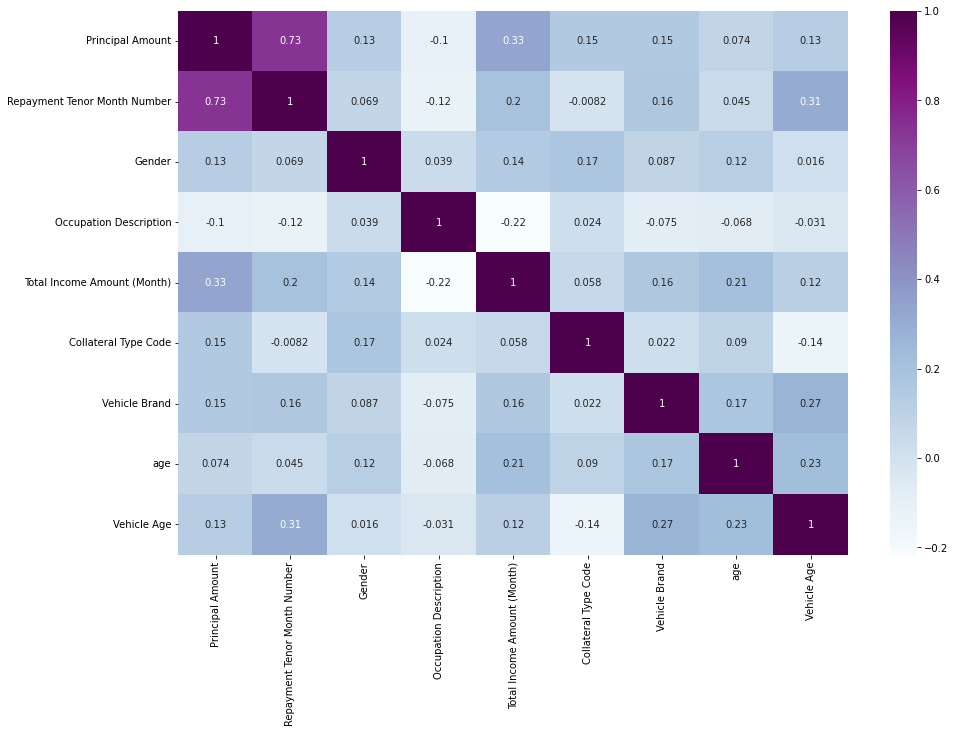

In [ ]:
corr = df2.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap="BuPu")

##Train Test Split

In [ ]:
X = df2.drop(columns=['DPD'], axis=1)
y = df2['DPD']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

##Model Training

In [ ]:
from sklearn.model_selection import cross_val_score
def classify(model, x,y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
    model.fit(x_train, y_train)
    print("Accuracy is : ", model.score(x_test, y_test)*100)
    #Cross Calidation
    #eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross Validation is ", np.mean(score)*100)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X,y)

Accuracy is :  85.55555555555556
Cross Validation is  85.95480225988702


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,X,y)

Accuracy is :  78.88888888888889
Cross Validation is  69.89830508474577


In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
classify(model,X,y)

Accuracy is :  83.33333333333334
Cross Validation is  85.28813559322033


In [ ]:
model = ExtraTreesClassifier()
classify(model,X,y)

Accuracy is :  80.0
Cross Validation is  82.27118644067797


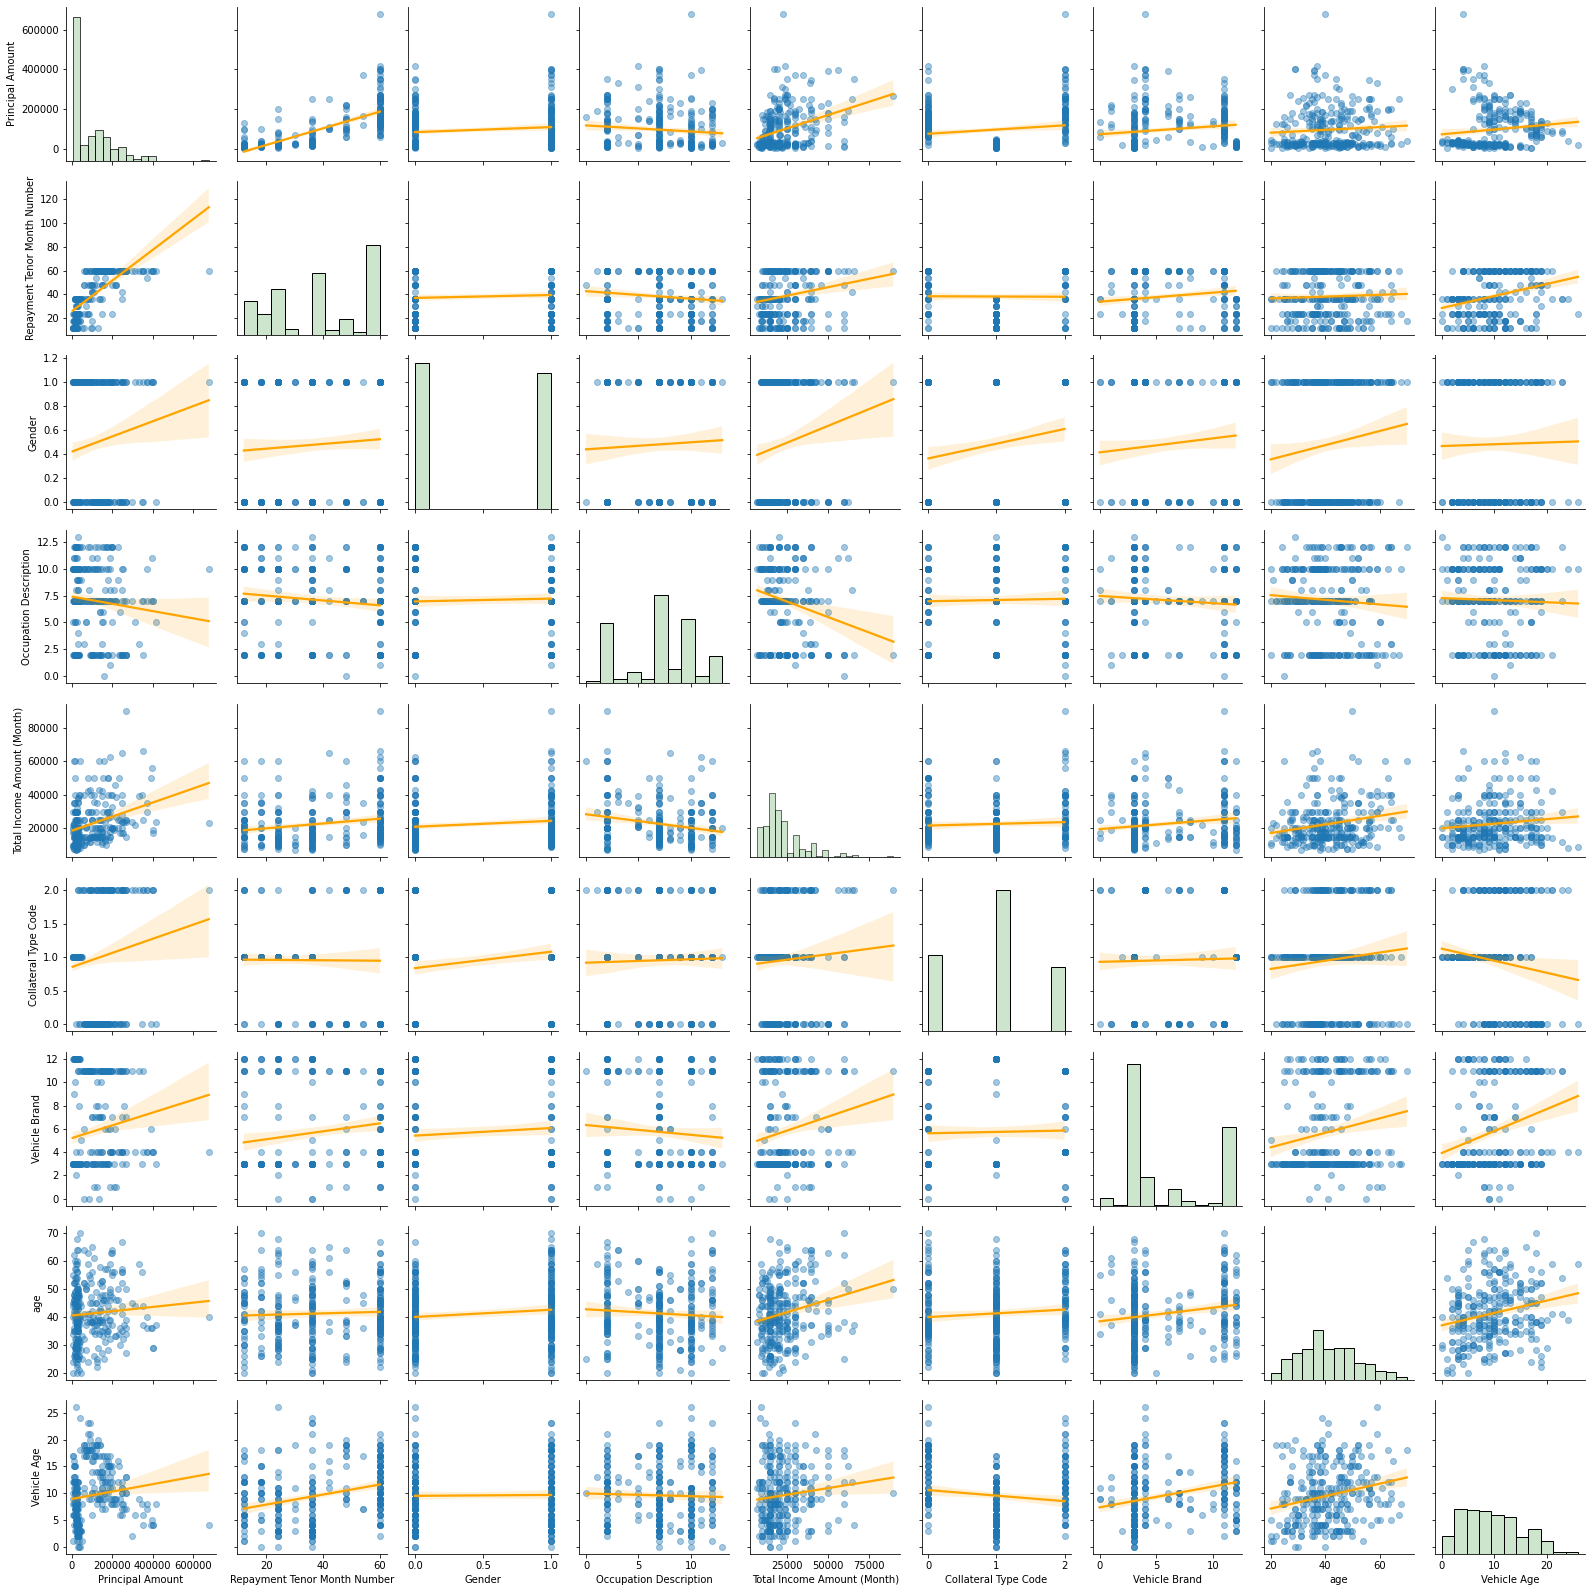

In [ ]:
sns.pairplot(df2,
             kind='reg',
             plot_kws={'scatter_kws':{'alpha':0.4},
                       'line_kws':{'color':'orange'}},
             diag_kws={'color':'green','alpha':.2});

In [ ]:
print(df2.columns)

Index(['Principal Amount', 'Repayment Tenor Month Number', 'Gender',
       'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'DPD', 'age', 'Vehicle Age'],
      dtype='object')


In [ ]:
cols = ['Principal Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age']

In [ ]:
X=df2[cols] #features
y = df2['DPD'] #label

In [ ]:
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, stratify=y, random_state=7
)

In [ ]:
from sklearn import tree

In [ ]:
model=DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
X_train.columns

Index(['Principal Amount', 'Repayment Tenor Month Number', 'Gender',
       'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],
      dtype='object')

In [ ]:
model.feature_importances_

array([0.20205568, 0.05020933, 0.02050867, 0.25829016, 0.13590273,
       0.0295138 , 0.        , 0.18152388, 0.12199576])

In [ ]:
fs = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
fs

Occupation Description          0.258290
Principal Amount                0.202056
age                             0.181524
Total Income Amount (Month)     0.135903
Vehicle Age                     0.121996
Repayment Tenor Month Number    0.050209
Collateral Type Code            0.029514
Gender                          0.020509
Vehicle Brand                   0.000000
dtype: float64

In [ ]:
fs.sum()

1.0

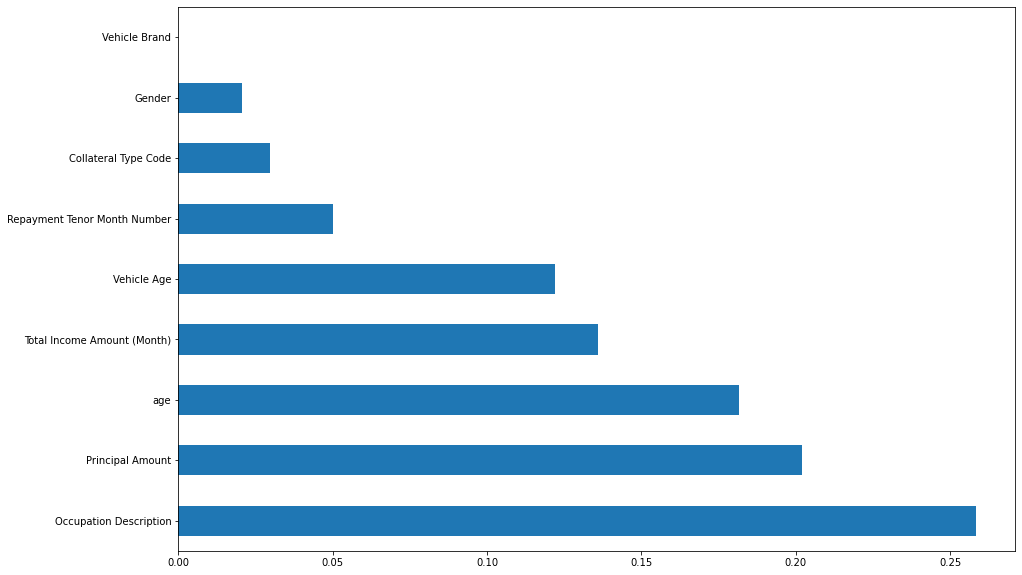

In [ ]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

In [ ]:
y_train.value_counts()

PL     180
NPL     29
Name: DPD, dtype: int64

In [ ]:
X = df2[['Principal Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age']]
y = df2['DPD']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X ,y ,test_size=0.3, random_state=0)
X_train.shape

(209, 9)

In [ ]:
'''#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc = sc_X.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)'''

'#feature scaling\nfrom sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nsc = sc_X.fit(X_train)\nX_train = sc.transform(X_train)\nX_test = sc.transform(X_test)'

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
classifier = model.fit(X_train,y_train)
classifier

DecisionTreeClassifier(criterion='entropy')

In [ ]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 0.7333333333333333


In [ ]:
df2.columns

Index(['Principal Amount', 'Repayment Tenor Month Number', 'Gender',
       'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'DPD', 'age', 'Vehicle Age'],
      dtype='object')

[Text(0.42, 0.9642857142857143, 'node #0\nage <= 35.5\nentropy = 0.593\nsamples = 209\nvalue = [30, 179]\nclass = PL'),
 Text(0.14, 0.8928571428571429, 'node #1\nTotal Income Amount (Month) <= 9500.0\nentropy = 0.841\nsamples = 63\nvalue = [17, 46]\nclass = PL'),
 Text(0.1, 0.8214285714285714, 'node #2\nentropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = NPL'),
 Text(0.18, 0.8214285714285714, 'node #3\nOccupation Description <= 3.5\nentropy = 0.784\nsamples = 60\nvalue = [14, 46]\nclass = PL'),
 Text(0.08, 0.75, 'node #4\nTotal Income Amount (Month) <= 27500.0\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]\nclass = NPL'),
 Text(0.04, 0.6785714285714286, 'node #5\nentropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = NPL'),
 Text(0.12, 0.6785714285714286, 'node #6\nPrincipal Amount <= 88850.0\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = PL'),
 Text(0.08, 0.6071428571428571, 'node #7\nentropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = NPL'),
 Text(0.16, 0.6071428571428571, 'node 

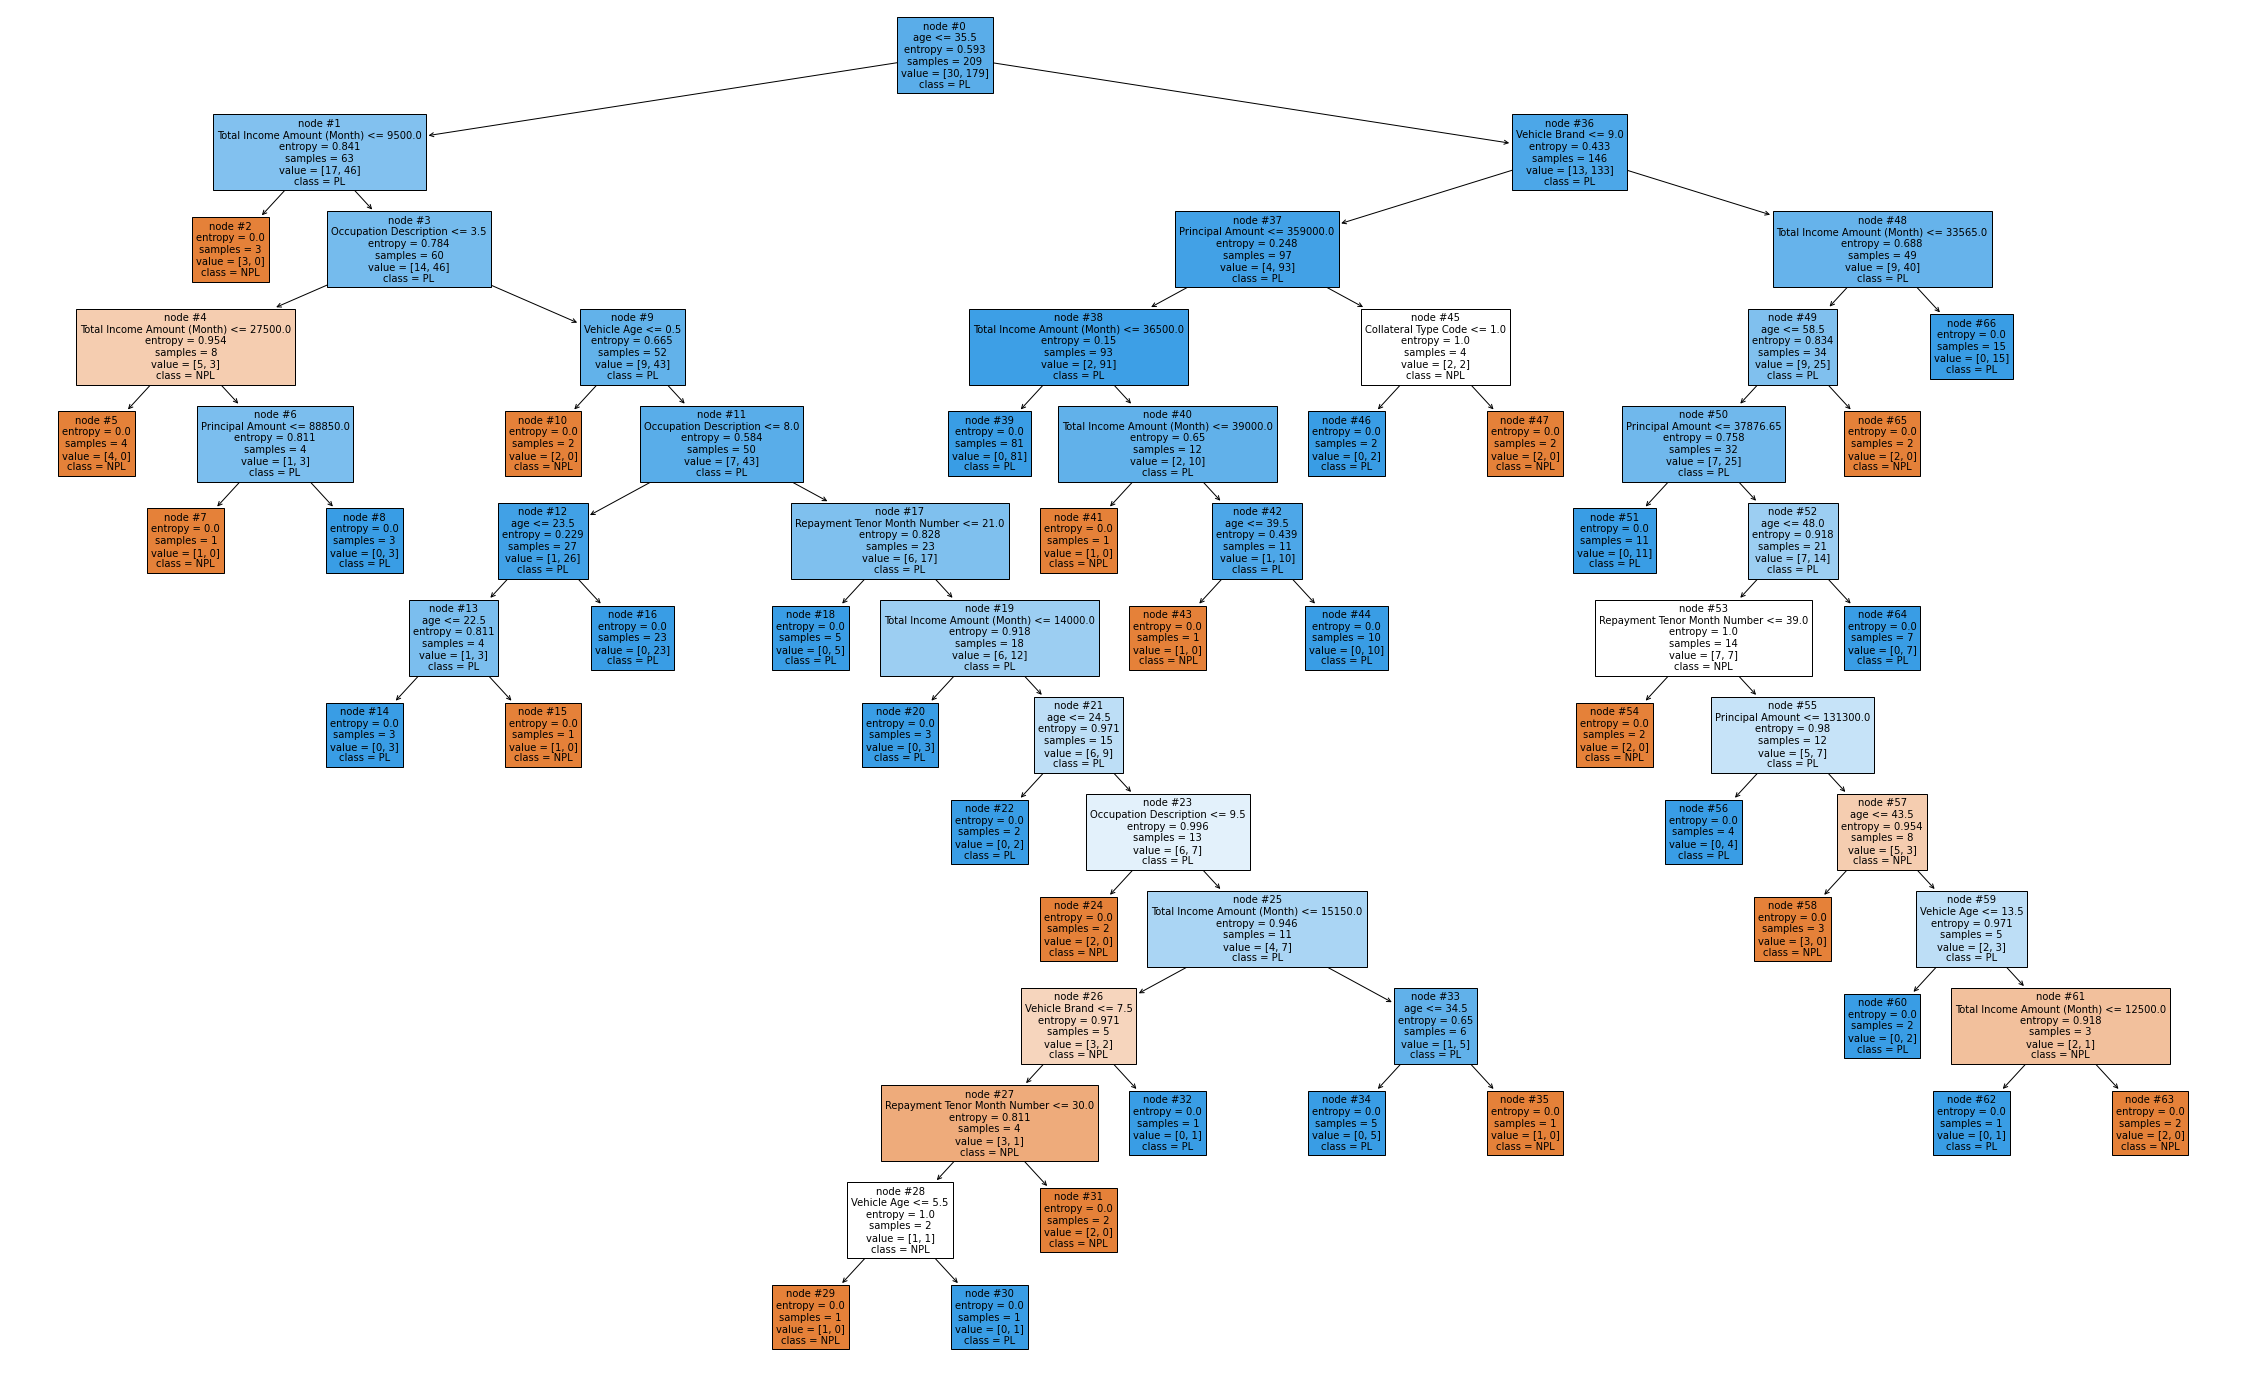

In [ ]:
from sklearn import tree
plt.figure(figsize=(40,25))
tree.plot_tree(classifier, 
                   feature_names=['Principal Amount', 'Repayment Tenor Month Number', 'Gender','Occupation Description', 'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],  
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True,fontsize=10)

In [ ]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=5)
#Predict the response for test dataset
classifier = classifier.fit(X_train, y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7777777777777778


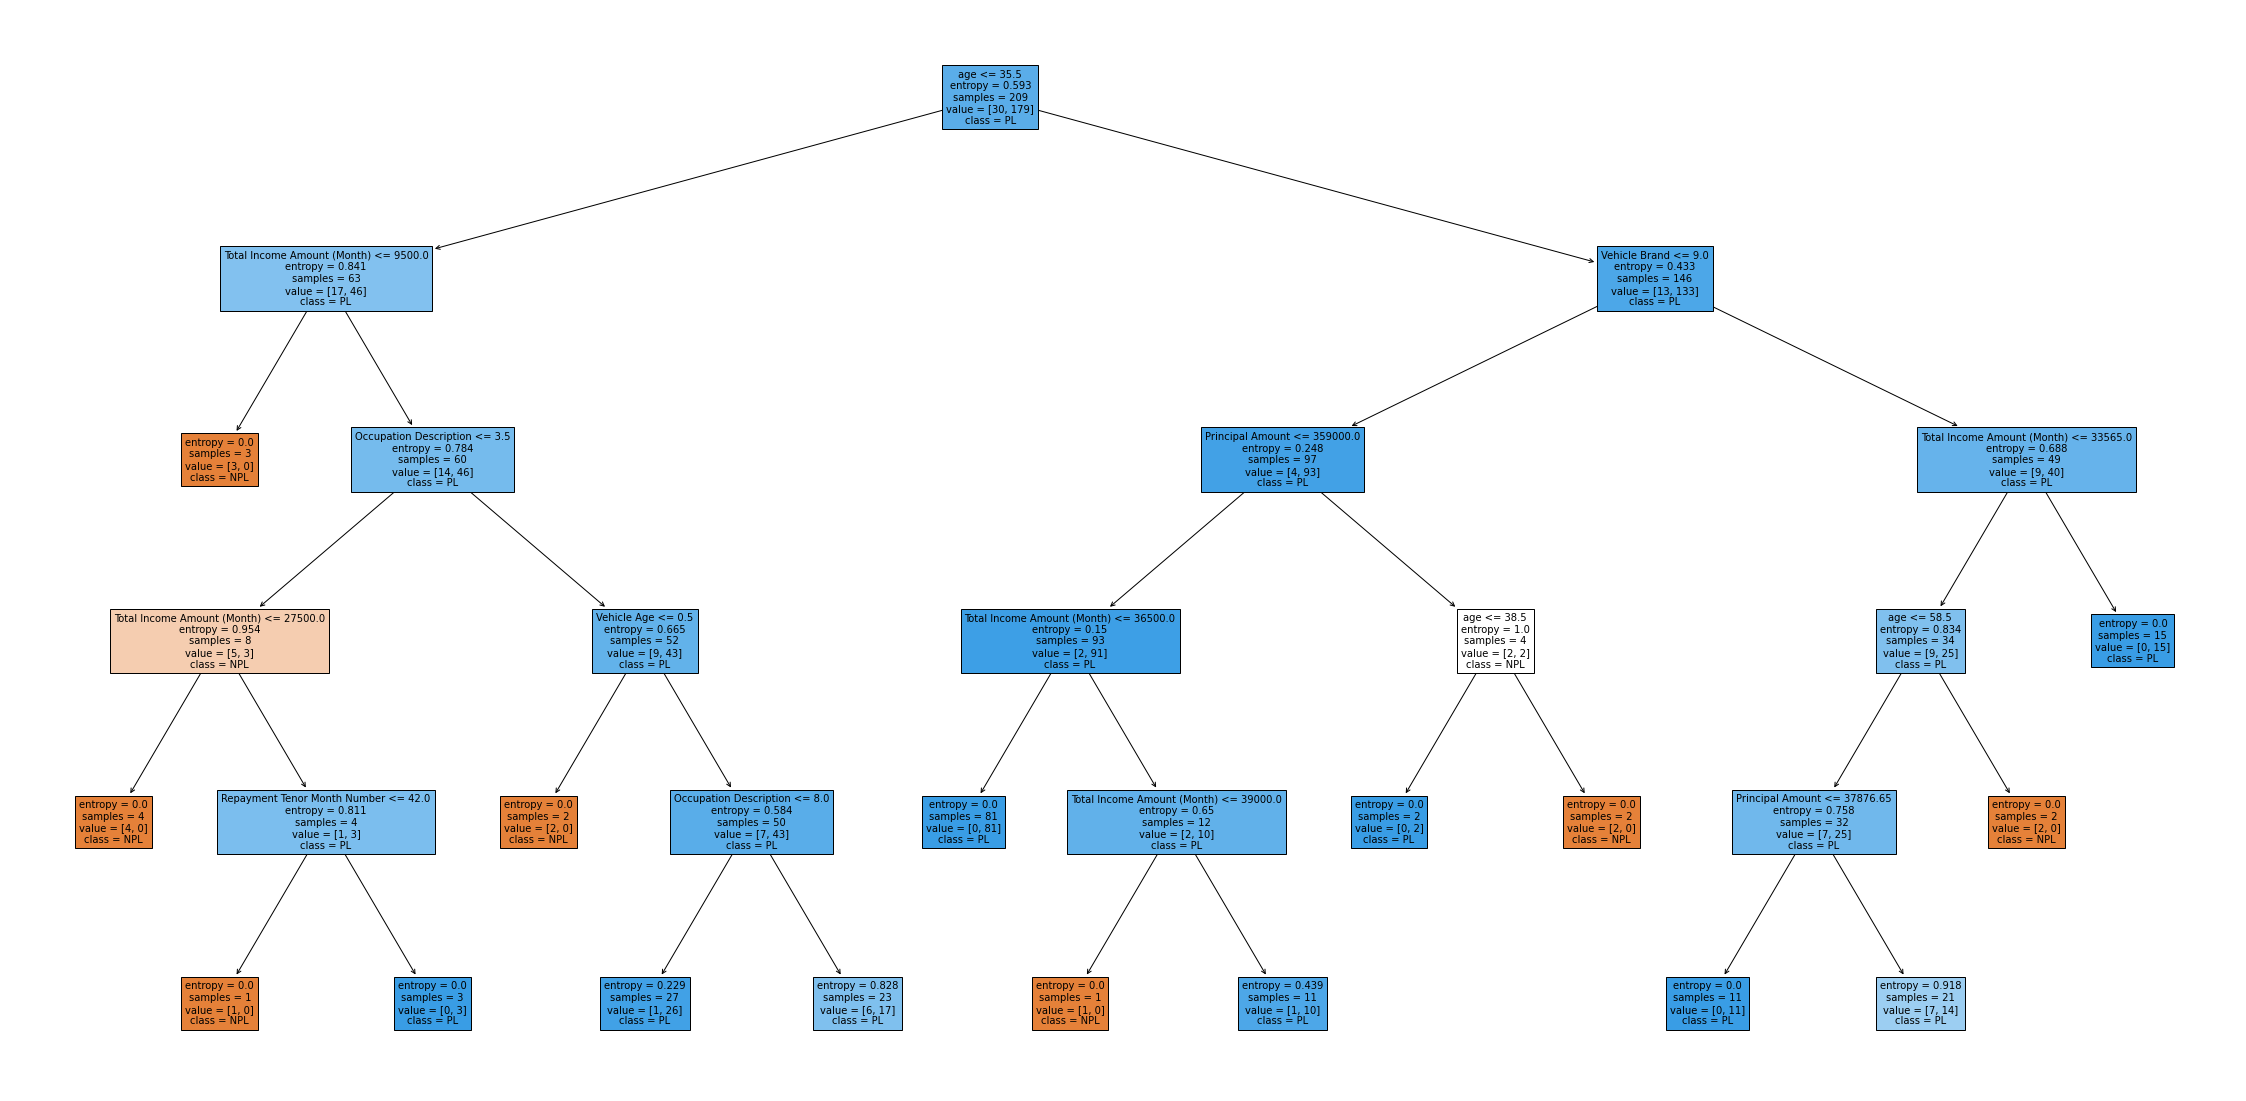

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Principal Amount', 'Repayment Tenor Month Number', 'Gender','Occupation Description', 'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],  
                   class_names=['NPL','PL'],
                   filled=True, fontsize=10)

In [ ]:
import graphviz

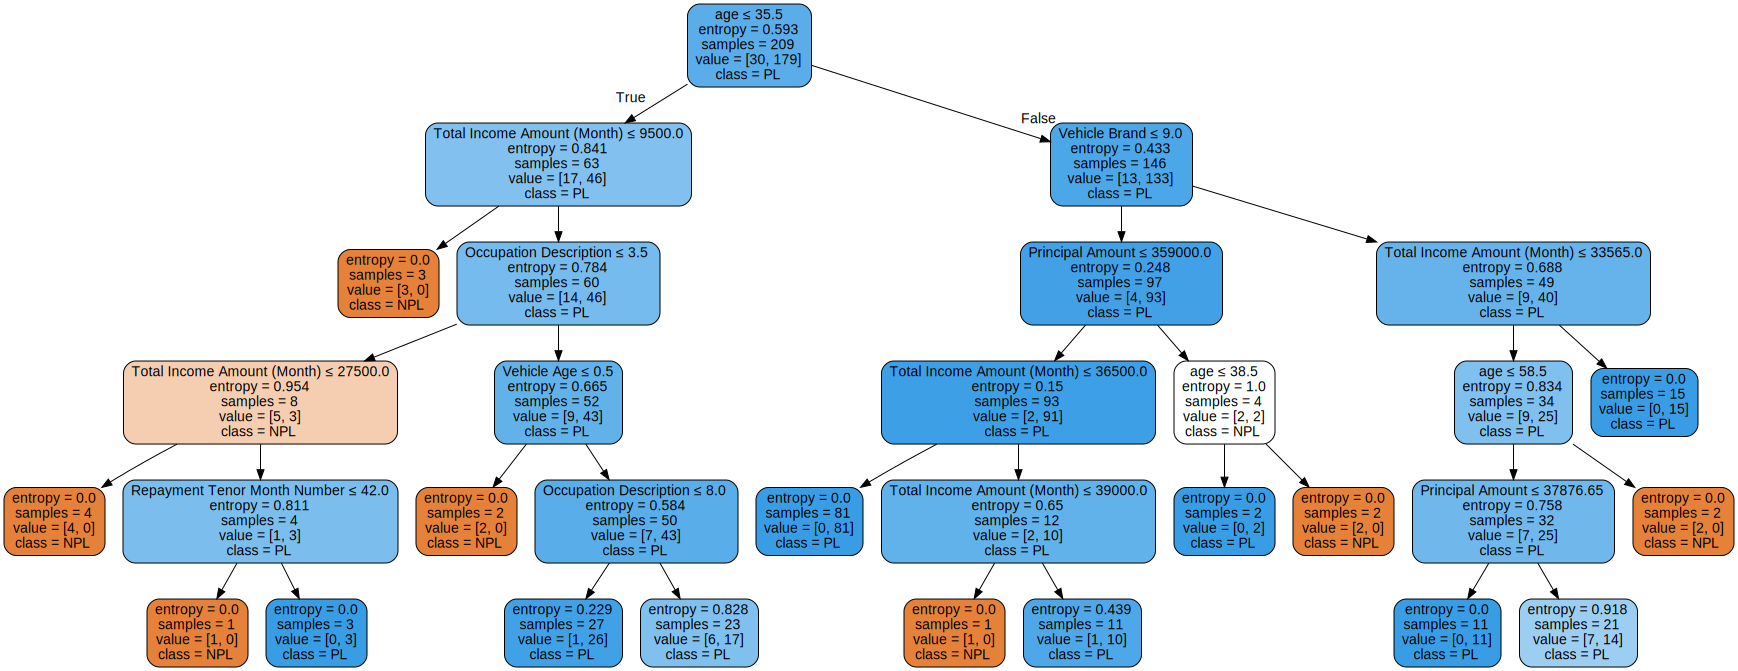

In [ ]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Principal Amount', 'Repayment Tenor Month Number', 'Gender','Occupation Description', 'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],  
                                class_names=['NPL','PL'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph